In [3]:
import numpy as np
import pandas as pd
df = pd.read_csv('Machine Learning Project Dataset.csv')

In [4]:
print(df.shape)

(2563, 17)


In [5]:
df.head(10)

,age,gender,chest_pain_type,blood_pressure,cholesterol,max_heart_rate,exercise_angina,plasma_glucose,skin_thickness,insulin,bmi,diabetes_pedigree,hypertension,heart_disease,residence_type,smoking_status,Volunteer Physically or Not
0,18,0.0,1,180,238,208,0,224.0,72.0,85.0,20.441910,2.216826,1,1,Rural,Smoker,Yes
1,18,0.0,1,139,247,70,0,236.0,78.0,NaN,43.681128,0.985551,0,1,Urban,Smoker,Yes
2,18,1.0,1,125,153,180,0,233.0,58.0,169.0,32.908738,0.562585,1,1,Rural,Non-Smoker,Yes
3,18,0.0,1,225,184,207,0,NaN,97.0,87.0,30.886420,2.092142,1,1,Urban,Smoker,Yes
4,18,1.0,1,150,186,183,0,121.0,61.0,150.0,28.210540,1.101789,0,1,Rural,Smoker,Yes
5,18,1.0,1,14,127,209,0,96.0,44.0,141.0,15.700953,1.424281,1,1,Rural,Non-Smoker,Yes
6,18,1.0,1,163,135,200,0,229.0,78.0,91.0,48.328308,0.596519,1,1,Rural,Smoker,Yes
7,18,1.0,1,93,167,103,0,NaN,88.0,113.0,32.093956,2.351737,0,0,Rural,Non-Smoker,Yes
8,18,1.0,1,90,203,216,0,87.0,63.0,116.0,36.848187,1.024320,0,0,Rural,Smoker,Yes
9,18,1.0,1,155,136,147,0,113.0,59.0,137.0,24.464470,0.197786,1,0,Urban,Smoker,Yes


In [6]:
df = df.dropna(axis=1, how='any') # dropped the columns with NaN values

In [7]:
print(df.shape)

(2563, 12)


In [8]:
#Count of NaN values per column
nan_count = df.isnull().sum()
print(nan_count)

#Only display columns with NaN values
print(nan_count[nan_count > 0])

age                            0
chest_pain_type                0
blood_pressure                 0
cholesterol                    0
max_heart_rate                 0
exercise_angina                0
bmi                            0
diabetes_pedigree              0
hypertension                   0
heart_disease                  0
smoking_status                 0
Volunteer Physically or Not    0
dtype: int64
Series([], dtype: int64)


In [9]:
# smoking_status is categorical Smoker/Non-Smoker/Unknown
# Volunteer Physically or Not is  Yes/No  

In [10]:
df.describe()

,age,chest_pain_type,blood_pressure,cholesterol,max_heart_rate,exercise_angina,bmi,diabetes_pedigree,hypertension,heart_disease
count,2563.000000,2563.000000,2563.000000,2563.000000,2563.000000,2563.000000,2563.000000,2563.000000,2563.000000,2563.000000
mean,49.465860,2.187281,133.570035,210.430745,144.458837,0.113149,29.913125,1.298862,0.500585,0.533750
std,20.385012,1.017817,47.841154,52.253878,43.620616,0.316836,11.654655,0.689691,0.500097,0.498957
min,18.000000,1.000000,0.000000,120.000000,70.000000,0.000000,10.013279,0.101457,0.000000,0.000000
25%,32.000000,1.000000,109.000000,166.000000,107.000000,0.000000,19.576507,0.685464,0.000000,0.000000
50%,48.000000,2.000000,135.000000,211.000000,144.000000,0.000000,30.092834,1.310098,1.000000,1.000000
75%,66.000000,3.000000,161.000000,256.000000,182.000000,0.000000,39.729322,1.903180,1.000000,1.000000
max,90.000000,4.000000,300.000000,300.000000,220.000000,1.000000,49.999449,2.499582,1.000000,1.000000


In [11]:
df.nunique() #return int representing how many unique values in each future

age                              73
chest_pain_type                   4
blood_pressure                  209
cholesterol                     181
max_heart_rate                  151
exercise_angina                   2
bmi                            2563
diabetes_pedigree              2563
hypertension                      2
heart_disease                     2
smoking_status                    3
Volunteer Physically or Not       2
dtype: int64

In [12]:
from sklearn.preprocessing import OneHotEncoder
onehot_enc = OneHotEncoder()
onehot_enc_result = onehot_enc.fit_transform(df[["smoking_status"]])
df = df.join (pd.DataFrame(onehot_enc_result.toarray(), columns = onehot_enc.categories_))
df = df.drop(columns = ['smoking_status'])

In [13]:
count_no = df['Volunteer Physically or Not'].value_counts()['No']
count_yes = df['Volunteer Physically or Not'].value_counts()['Yes']
print(f'No count: {count_no}')
print(f'Yes count: {count_yes}')
# checking if the number of yes and no are balanced or not

No count: 1292
Yes count: 1271


In [14]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_enc = OrdinalEncoder()
df[["Volunteer Physically or Not"]] = ordinal_enc.fit_transform(df[["Volunteer Physically or Not"]])

In [15]:
df.head(10)

,age,chest_pain_type,blood_pressure,cholesterol,max_heart_rate,exercise_angina,bmi,diabetes_pedigree,hypertension,heart_disease,Volunteer Physically or Not,"(Non-Smoker,)","(Smoker,)","(Unknown,)"
0,18,1,180,238,208,0,20.441910,2.216826,1,1,1.0,0.0,1.0,0.0
1,18,1,139,247,70,0,43.681128,0.985551,0,1,1.0,0.0,1.0,0.0
2,18,1,125,153,180,0,32.908738,0.562585,1,1,1.0,1.0,0.0,0.0
3,18,1,225,184,207,0,30.886420,2.092142,1,1,1.0,0.0,1.0,0.0
4,18,1,150,186,183,0,28.210540,1.101789,0,1,1.0,0.0,1.0,0.0
5,18,1,14,127,209,0,15.700953,1.424281,1,1,1.0,1.0,0.0,0.0
6,18,1,163,135,200,0,48.328308,0.596519,1,1,1.0,0.0,1.0,0.0
7,18,1,93,167,103,0,32.093956,2.351737,0,0,1.0,1.0,0.0,0.0
8,18,1,90,203,216,0,36.848187,1.024320,0,0,1.0,0.0,1.0,0.0
9,18,1,155,136,147,0,24.464470,0.197786,1,0,1.0,0.0,1.0,0.0


In [16]:
print(df.shape)

(2563, 14)


In [17]:
# y is the label that we want to predict or the output
# x are the list of features that will determine the output for us

In [18]:
y = df['Volunteer Physically or Not'].to_numpy()

In [19]:
df = df.drop(columns = ['Volunteer Physically or Not'])

In [20]:
X = df.to_numpy()
X

array([[ 18.,   1., 180., ...,   0.,   1.,   0.],
       [ 18.,   1., 139., ...,   0.,   1.,   0.],
       [ 18.,   1., 125., ...,   1.,   0.,   0.],
       ...,
       [ 90.,   2., 120., ...,   1.,   0.,   0.],
       [ 90.,   3., 133., ...,   0.,   1.,   0.],
       [ 90.,   4., 161., ...,   0.,   1.,   0.]])

In [21]:
print(df.shape)

(2563, 13)


In [22]:
df.head(10)

,age,chest_pain_type,blood_pressure,cholesterol,max_heart_rate,exercise_angina,bmi,diabetes_pedigree,hypertension,heart_disease,"(Non-Smoker,)","(Smoker,)","(Unknown,)"
0,18,1,180,238,208,0,20.441910,2.216826,1,1,0.0,1.0,0.0
1,18,1,139,247,70,0,43.681128,0.985551,0,1,0.0,1.0,0.0
2,18,1,125,153,180,0,32.908738,0.562585,1,1,1.0,0.0,0.0
3,18,1,225,184,207,0,30.886420,2.092142,1,1,0.0,1.0,0.0
4,18,1,150,186,183,0,28.210540,1.101789,0,1,0.0,1.0,0.0
5,18,1,14,127,209,0,15.700953,1.424281,1,1,1.0,0.0,0.0
6,18,1,163,135,200,0,48.328308,0.596519,1,1,0.0,1.0,0.0
7,18,1,93,167,103,0,32.093956,2.351737,0,0,1.0,0.0,0.0
8,18,1,90,203,216,0,36.848187,1.024320,0,0,0.0,1.0,0.0
9,18,1,155,136,147,0,24.464470,0.197786,1,0,0.0,1.0,0.0


In [104]:
#Min Samples Split
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix
import numpy as np

# Initialize lists to store the performance metrics
avg_train_acc1 = []
avg_test_acc1 = []
avg_node_count = []
best_accuracy = None
best_min_samples_split = None

# Additional lists to store new performance metrics
avg_f1_scores = []
avg_precision_scores = []
avg_recall_scores = []
avg_auc_scores = []
confusion_matrices = []



# Create a list to store the range of min_samples_split values
min_samples_split_values = list(range(2, 1000, 50))

for i in min_samples_split_values:
    current_train_acc = []
    current_test_acc = []
    current_node_count = []
    current_f1_scores = []
    current_precision_scores = []
    current_recall_scores = []
    current_auc_scores = []
    current_confusion_matrices = []
    
    for j in range(1, 10):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        DTclass = DecisionTreeClassifier(min_samples_split=i)
        DTclass.fit(X_train, y_train)
        
        y_pred = DTclass.predict(X_test)
        y_pred_proba = DTclass.predict_proba(X_test)[:, 1]

        current_train_acc.append(DTclass.score(X_train, y_train))
        current_test_acc.append(DTclass.score(X_test, y_test))
        current_node_count.append(DTclass.tree_.node_count)
        current_f1_scores.append(f1_score(y_test, y_pred))
        current_precision_scores.append(precision_score(y_test, y_pred))
        current_recall_scores.append(recall_score(y_test, y_pred))
        current_auc_scores.append(roc_auc_score(y_test, y_pred_proba))
        current_confusion_matrices.append(confusion_matrix(y_test, y_pred))

    avg_train_acc1.append(np.mean(current_train_acc))  
    avg_test_acc1.append(np.mean(current_test_acc))
    avg_node_count.append(np.mean(current_node_count))
    avg_f1_scores.append(np.mean(current_f1_scores))
    avg_precision_scores.append(np.mean(current_precision_scores))
    avg_recall_scores.append(np.mean(current_recall_scores))
    avg_auc_scores.append(np.mean(current_auc_scores))
    confusion_matrices.append(current_confusion_matrices[np.argmax(current_test_acc)])
    
    max_test_acc = np.max(current_test_acc)
    
    if best_accuracy is None or max_test_acc > best_accuracy:
        best_accuracy = max_test_acc
        best_min_samples_split = i
        
print("The best min_samples_split value:", best_min_samples_split)
print("The best accuracy:", best_accuracy)


The best min_samples_split value: 2
The best accuracy: 1.0


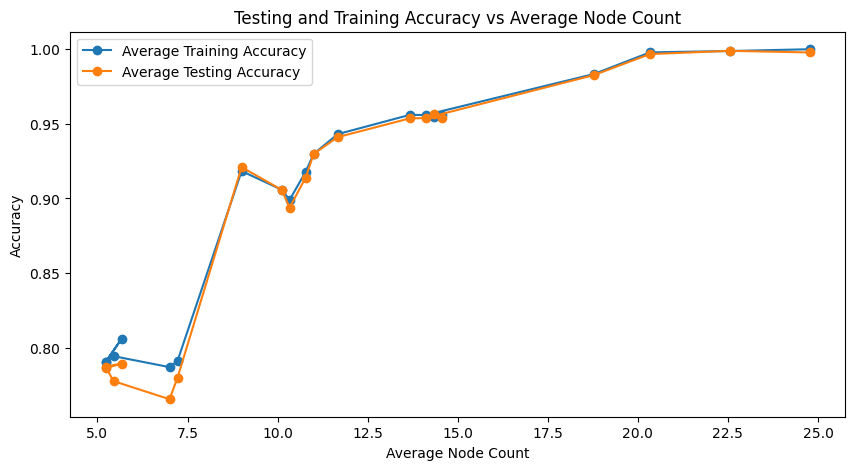

In [105]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(avg_node_count, avg_train_acc1, 'o-', label='Average Training Accuracy')
plt.plot(avg_node_count, avg_test_acc1, 'o-', label='Average Testing Accuracy')
plt.xlabel('Average Node Count')
plt.ylabel('Accuracy')
plt.title('Testing and Training Accuracy vs Average Node Count')
plt.legend()
plt.show()

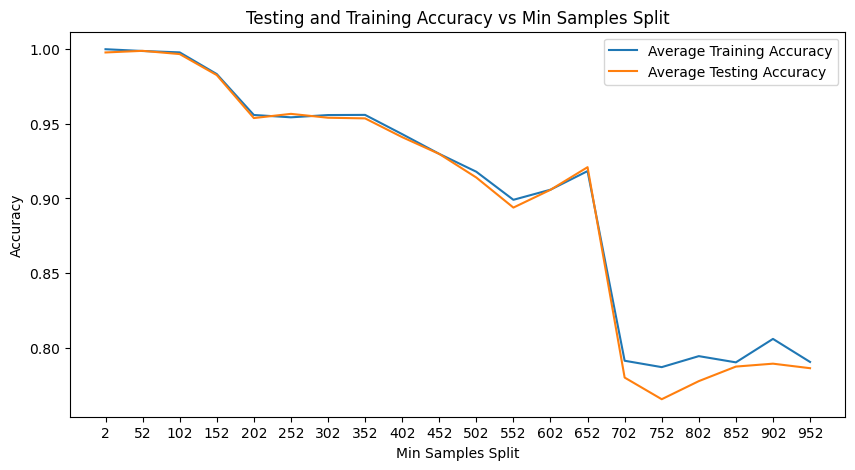

In [106]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(range(2, 1000, 50), avg_train_acc1, label='Average Training Accuracy')
plt.plot(range(2, 1000, 50), avg_test_acc1, label='Average Testing Accuracy')
plt.xticks(range(2, 1000, 50))  # To show every min_samples_split value on x-axis
plt.xlabel('Min Samples Split')
plt.ylabel('Accuracy')
plt.title('Testing and Training Accuracy vs Min Samples Split')
plt.legend()
plt.show()


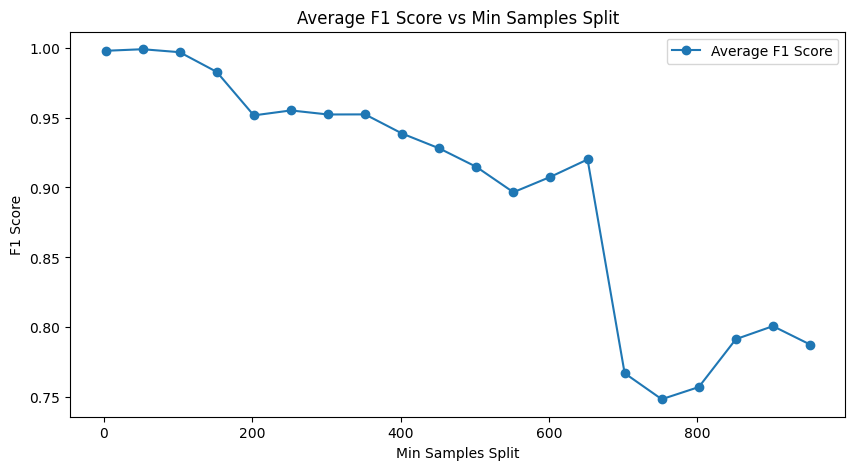

In [107]:
#F1 Score:
plt.figure(figsize=(10, 5))
plt.plot(min_samples_split_values, avg_f1_scores, 'o-', label='Average F1 Score')
plt.xlabel('Min Samples Split')
plt.ylabel('F1 Score')
plt.title('Average F1 Score vs Min Samples Split')
plt.legend()
plt.show()

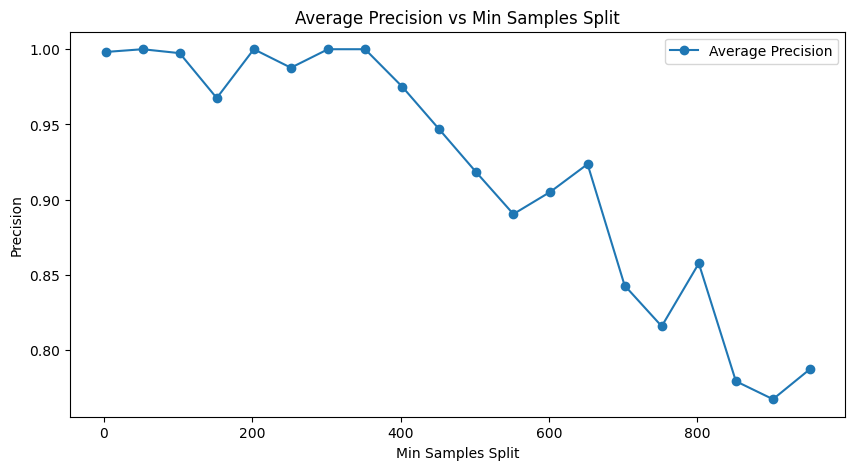

In [108]:
#Precision:
plt.figure(figsize=(10, 5))
plt.plot(min_samples_split_values, avg_precision_scores, 'o-', label='Average Precision')
plt.xlabel('Min Samples Split')
plt.ylabel('Precision')
plt.title('Average Precision vs Min Samples Split')
plt.legend()
plt.show()

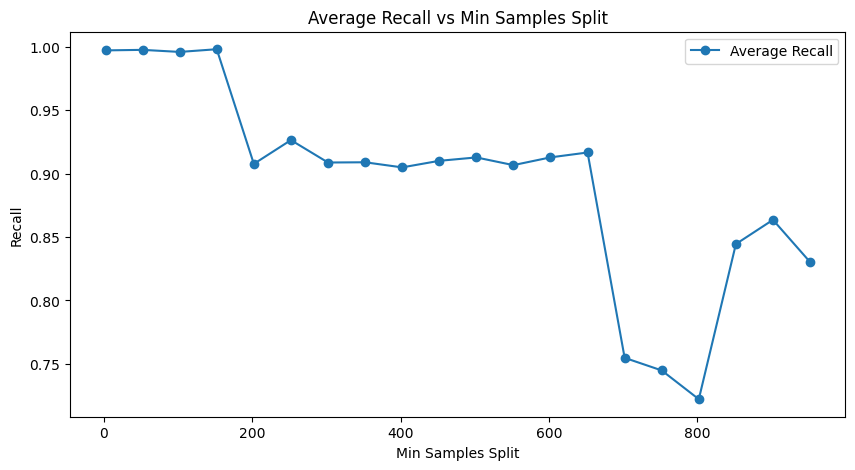

In [109]:
#Recall:
plt.figure(figsize=(10, 5))
plt.plot(min_samples_split_values, avg_recall_scores, 'o-', label='Average Recall')
plt.xlabel('Min Samples Split')
plt.ylabel('Recall')
plt.title('Average Recall vs Min Samples Split')
plt.legend()
plt.show()

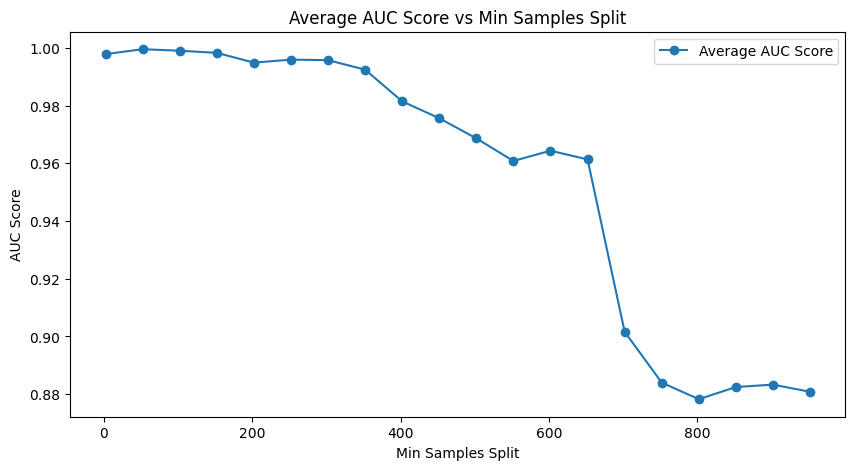

In [110]:
#AUC plot:
plt.figure(figsize=(10, 5))
plt.plot(min_samples_split_values, avg_auc_scores, 'o-', label='Average AUC Score')
plt.xlabel('Min Samples Split')
plt.ylabel('AUC Score')
plt.title('Average AUC Score vs Min Samples Split')
plt.legend()
plt.show()

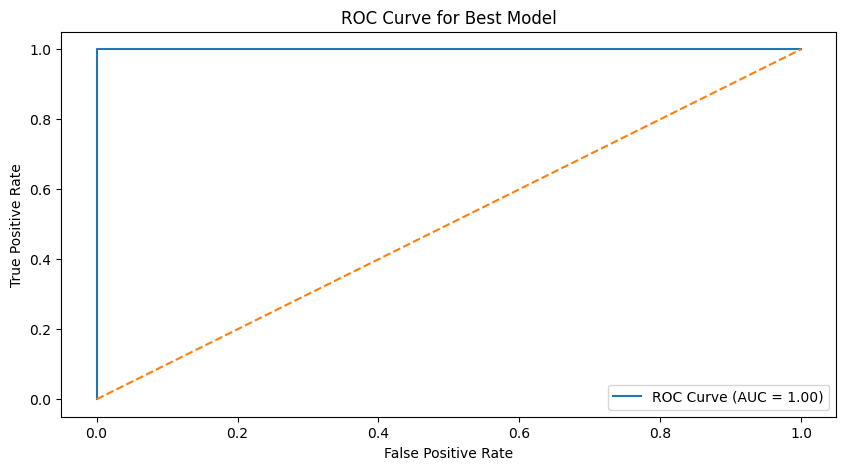

In [111]:
#ROC Curve for the best model:
from sklearn.metrics import roc_curve

# Assuming best_min_samples_split is the value of min_samples_split that resulted in the highest average test accuracy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
best_model = DecisionTreeClassifier(min_samples_split=best_min_samples_split)
best_model.fit(X_train, y_train)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(10, 5))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_score(y_test, y_pred_proba):.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Best Model')
plt.legend()
plt.show()


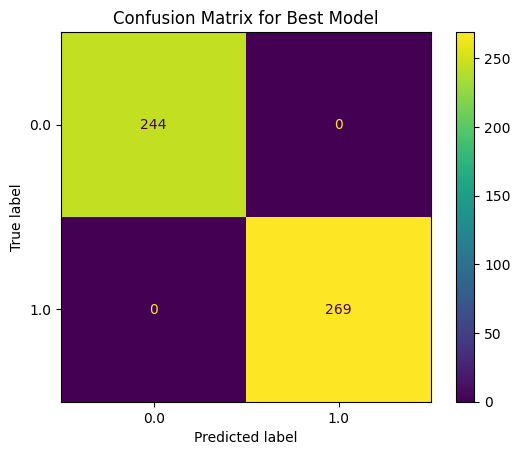

In [112]:
#Confusion Matrix:
from sklearn.metrics import ConfusionMatrixDisplay

# The best model is already fitted in the previous ROC curve block
ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test)
plt.title('Confusion Matrix for Best Model')
plt.show()


In [113]:
#Max Depth
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix
import numpy as np

# Initialize lists to store the performance metrics
avg_train_acc = []
avg_test_acc = []
avg_node_count = []
best_accuracy = None
best_max_depth = None

# Additional lists to store new performance metrics
avg_f1_scores = []
avg_precision_scores = []
avg_recall_scores = []
avg_auc_scores = []
confusion_matrices = []

# Create a list to store the range of max_depth values
max_depth_values = list(range(2, 31))  # Adjusted for a sensible range

for max_depth in max_depth_values:
    current_train_acc = []
    current_test_acc = []
    current_node_count = []
    current_f1_scores = []
    current_precision_scores = []
    current_recall_scores = []
    current_auc_scores = []
    current_confusion_matrices = []
    
    for _ in range(10):  # Run each configuration 10 times
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        DTclass = DecisionTreeClassifier(max_depth=max_depth)
        DTclass.fit(X_train, y_train)
        
        y_pred = DTclass.predict(X_test)
        y_pred_proba = DTclass.predict_proba(X_test)[:, 1]

        current_train_acc.append(DTclass.score(X_train, y_train))
        current_test_acc.append(DTclass.score(X_test, y_test))
        current_node_count.append(DTclass.tree_.node_count)
        current_f1_scores.append(f1_score(y_test, y_pred))
        current_precision_scores.append(precision_score(y_test, y_pred))
        current_recall_scores.append(recall_score(y_test, y_pred))
        current_auc_scores.append(roc_auc_score(y_test, y_pred_proba))
        current_confusion_matrices.append(confusion_matrix(y_test, y_pred))

    avg_train_acc.append(np.mean(current_train_acc))  
    avg_test_acc.append(np.mean(current_test_acc))
    avg_node_count.append(np.mean(current_node_count))
    avg_f1_scores.append(np.mean(current_f1_scores))
    avg_precision_scores.append(np.mean(current_precision_scores))
    avg_recall_scores.append(np.mean(current_recall_scores))
    avg_auc_scores.append(np.mean(current_auc_scores))
    confusion_matrices.append(current_confusion_matrices[np.argmax(current_test_acc)])
    
    # Update the best accuracy and max_depth
    max_test_acc = np.max(current_test_acc)
    if best_accuracy is None or max_test_acc > best_accuracy:
        best_accuracy = max_test_acc
        best_max_depth = max_depth

print("The best max_depth value:", best_max_depth)
print("The best accuracy:", best_accuracy)


The best max_depth value: 5
The best accuracy: 1.0


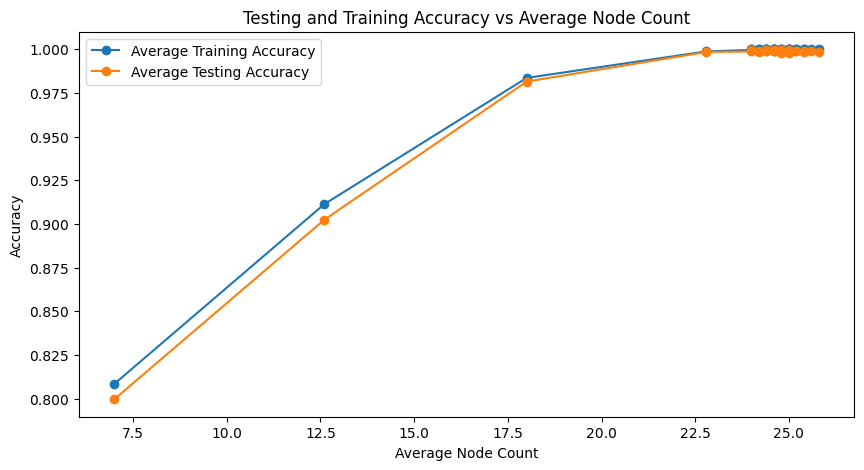

In [116]:
#Accuracy vs Average Node Count
plt.figure(figsize=(10, 5))
plt.plot(avg_node_count, avg_train_acc, 'o-', label='Average Training Accuracy')
plt.plot(avg_node_count, avg_test_acc, 'o-', label='Average Testing Accuracy')
plt.xlabel('Average Node Count')
plt.ylabel('Accuracy')
plt.title('Testing and Training Accuracy vs Average Node Count')
plt.legend()
plt.show()


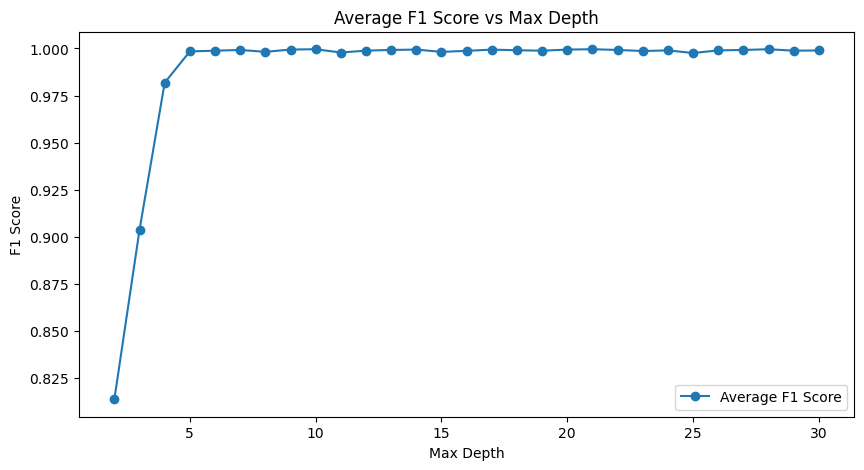

In [118]:
#F1 Score:
plt.figure(figsize=(10, 5))
plt.plot(max_depth_values, avg_f1_scores, 'o-', label='Average F1 Score')
plt.xlabel('Max Depth')
plt.ylabel('F1 Score')
plt.title('Average F1 Score vs Max Depth')
plt.legend()
plt.show()

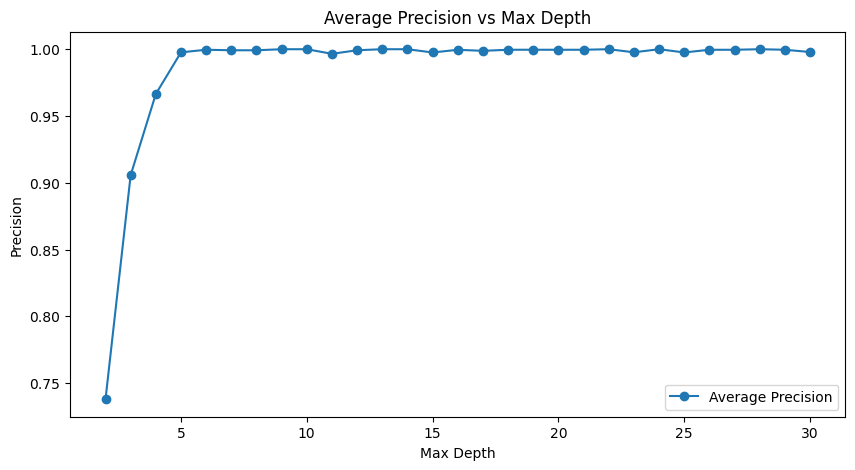

In [119]:
#Precision:
plt.figure(figsize=(10, 5))
plt.plot(max_depth_values, avg_precision_scores, 'o-', label='Average Precision')
plt.xlabel('Max Depth')
plt.ylabel('Precision')
plt.title('Average Precision vs Max Depth')
plt.legend()
plt.show()

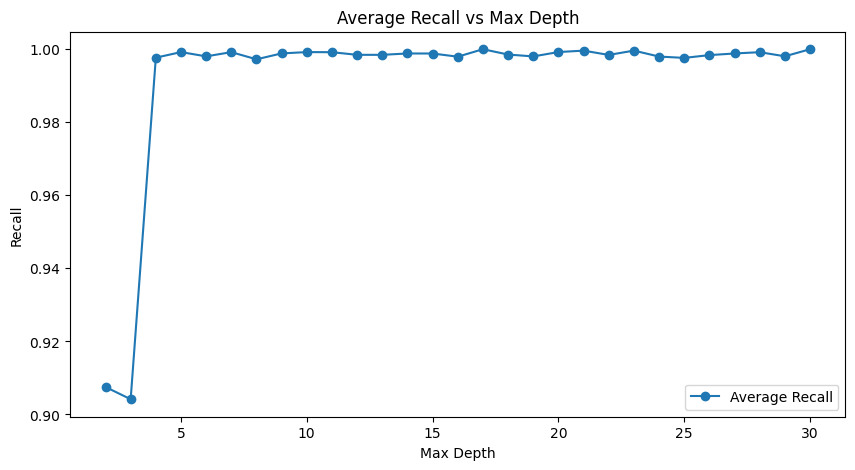

In [120]:
#Recall:
plt.figure(figsize=(10, 5))
plt.plot(max_depth_values, avg_recall_scores, 'o-', label='Average Recall')
plt.xlabel('Max Depth')
plt.ylabel('Recall')
plt.title('Average Recall vs Max Depth')
plt.legend()
plt.show()


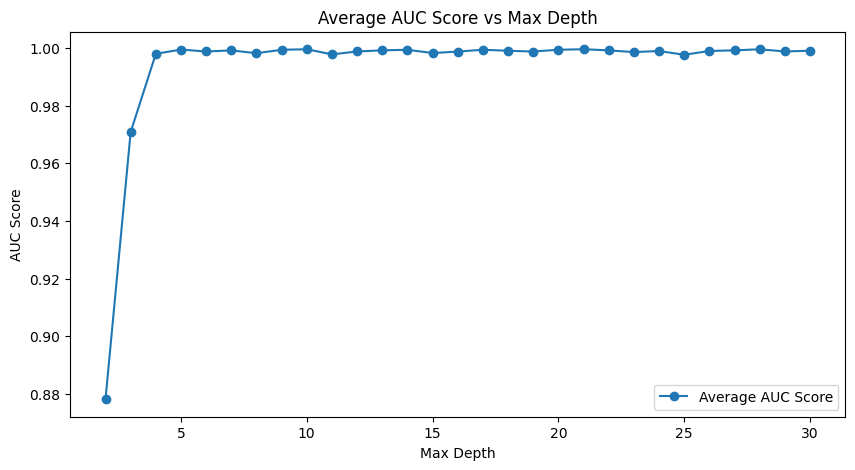

In [122]:
#AUC:
plt.figure(figsize=(10, 5))
plt.plot(max_depth_values, avg_auc_scores, 'o-', label='Average AUC Score')
plt.xlabel('Max Depth')
plt.ylabel('AUC Score')
plt.title('Average AUC Score vs Max Depth')
plt.legend()
plt.show()


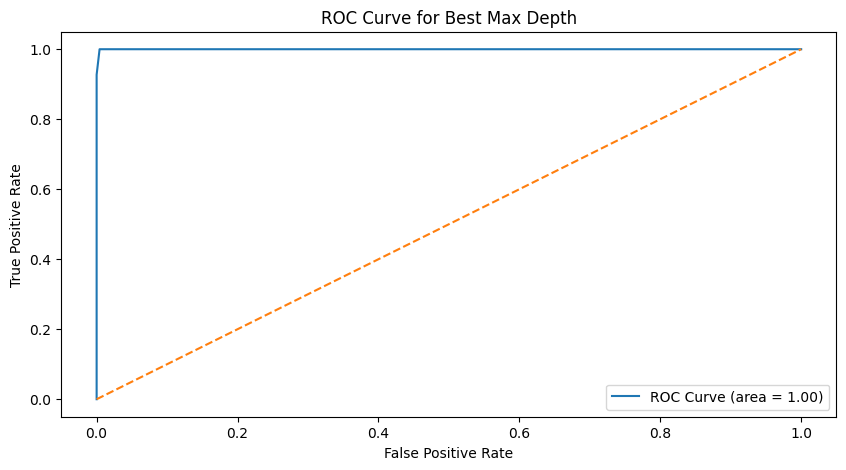

In [123]:
#ROC Curve:
from sklearn.metrics import roc_curve, auc

# Assuming best_max_depth is the value of max_depth that resulted in the highest average test accuracy
best_model = DecisionTreeClassifier(max_depth=best_max_depth)
best_model.fit(X_train, y_train)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 5))
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Best Max Depth')
plt.legend()
plt.show()

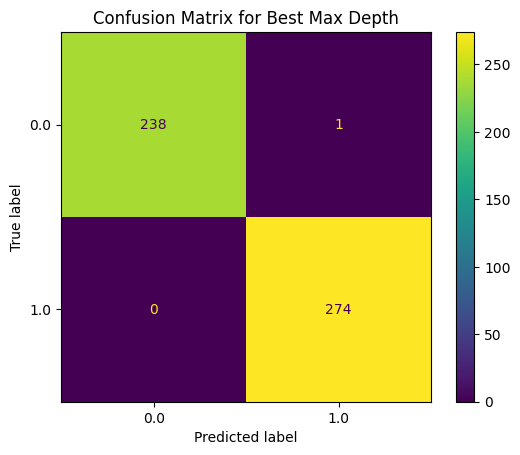

In [125]:
#Confusion Matrix:
from sklearn.metrics import ConfusionMatrixDisplay

best_model = DecisionTreeClassifier(max_depth=best_max_depth)
best_model.fit(X_train, y_train)
ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test)
plt.title('Confusion Matrix for Best Max Depth')
plt.show()


In [184]:
# min samples leaf
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix
import numpy as np

# Initialize lists to store the performance metrics
avg_train_acc = []
avg_test_acc = []
avg_node_count = []
best_accuracy = None
best_min_samples_leaf = None

# Additional lists to store new performance metrics
avg_f1_scores = []
avg_precision_scores = []
avg_recall_scores = []
avg_auc_scores = []
confusion_matrices = []

# Create a list to store the range of min_samples_leaf values
min_samples_leaf_values = list(range(2, 20))  # Smaller range for min_samples_leaf for more granularity

for min_samples_leaf in min_samples_leaf_values:
    current_train_acc = []
    current_test_acc = []
    current_node_count = []
    current_f1_scores = []
    current_precision_scores = []
    current_recall_scores = []
    current_auc_scores = []
    current_confusion_matrices = []
    
    for _ in range(10):  # Run each configuration 10 times
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        DTclass = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf)
        DTclass.fit(X_train, y_train)
        
        y_pred = DTclass.predict(X_test)
        y_pred_proba = DTclass.predict_proba(X_test)[:, 1]

        current_train_acc.append(DTclass.score(X_train, y_train))
        current_test_acc.append(DTclass.score(X_test, y_test))
        current_node_count.append(DTclass.tree_.node_count)
        current_f1_scores.append(f1_score(y_test, y_pred))
        current_precision_scores.append(precision_score(y_test, y_pred))
        current_recall_scores.append(recall_score(y_test, y_pred))
        current_auc_scores.append(roc_auc_score(y_test, y_pred_proba))
        current_confusion_matrices.append(confusion_matrix(y_test, y_pred))

    avg_train_acc.append(np.mean(current_train_acc))  
    avg_test_acc.append(np.mean(current_test_acc))
    avg_node_count.append(np.mean(current_node_count))
    avg_f1_scores.append(np.mean(current_f1_scores))
    avg_precision_scores.append(np.mean(current_precision_scores))
    avg_recall_scores.append(np.mean(current_recall_scores))
    avg_auc_scores.append(np.mean(current_auc_scores))
    confusion_matrices.append(current_confusion_matrices[np.argmax(current_test_acc)])
    
    # Update the best accuracy and min_samples_leaf
    max_test_acc = np.max(current_test_acc)
    if best_accuracy is None or max_test_acc > best_accuracy:
        best_accuracy = max_test_acc
        best_min_samples_leaf = min_samples_leaf

print("The best min_samples_leaf value:", best_min_samples_leaf)
print("The best accuracy:", best_accuracy)

The best min_samples_leaf value: 2
The best accuracy: 1.0


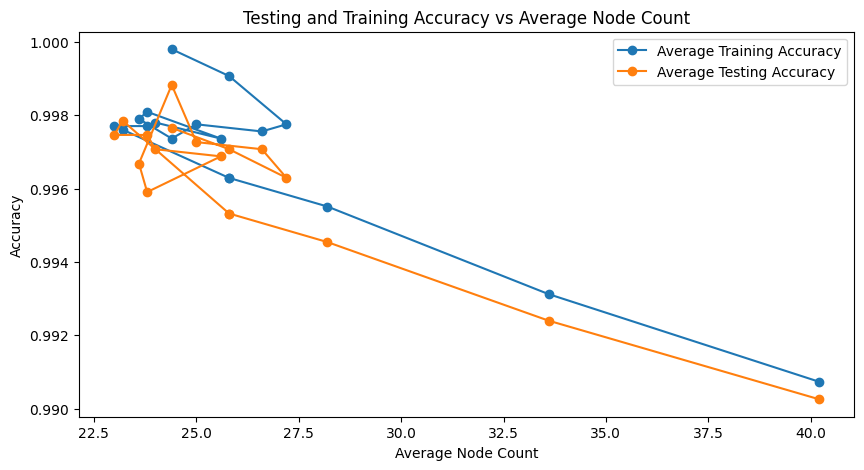

In [185]:
#Accuracy vs Avg Node Count
plt.figure(figsize=(10, 5))
plt.plot(avg_node_count, avg_train_acc, 'o-', label='Average Training Accuracy')
plt.plot(avg_node_count, avg_test_acc, 'o-', label='Average Testing Accuracy')
plt.xlabel('Average Node Count')
plt.ylabel('Accuracy')
plt.title('Testing and Training Accuracy vs Average Node Count')
plt.legend()
plt.show()

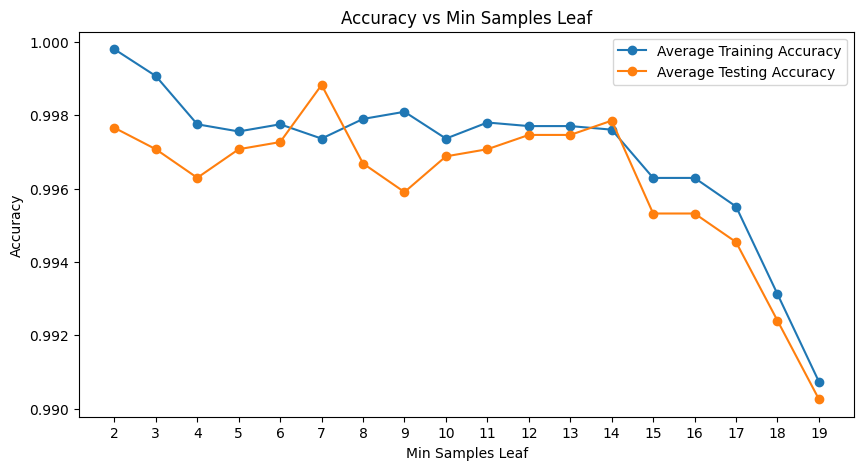

In [186]:
import matplotlib.pyplot as plt

# Assuming avg_train_acc and avg_test_acc have been populated as per the previous code cells

plt.figure(figsize=(10, 5))
plt.plot(min_samples_leaf_values, avg_train_acc, 'o-', label='Average Training Accuracy')
plt.plot(min_samples_leaf_values, avg_test_acc, 'o-', label='Average Testing Accuracy')
plt.xlabel('Min Samples Leaf')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Min Samples Leaf')
plt.xticks(min_samples_leaf_values)
plt.legend()
plt.show()


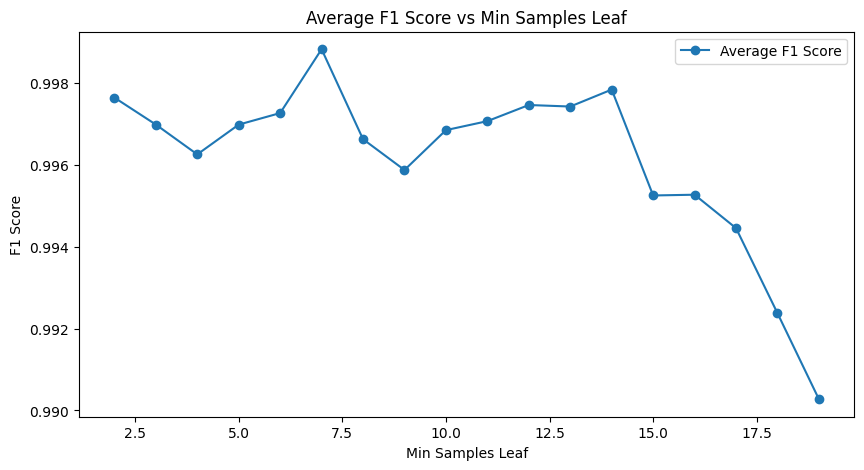

In [187]:
#F1 Score:
plt.figure(figsize=(10, 5))
plt.plot(min_samples_leaf_values, avg_f1_scores, 'o-', label='Average F1 Score')
plt.xlabel('Min Samples Leaf')
plt.ylabel('F1 Score')
plt.title('Average F1 Score vs Min Samples Leaf')
plt.legend()
plt.show()

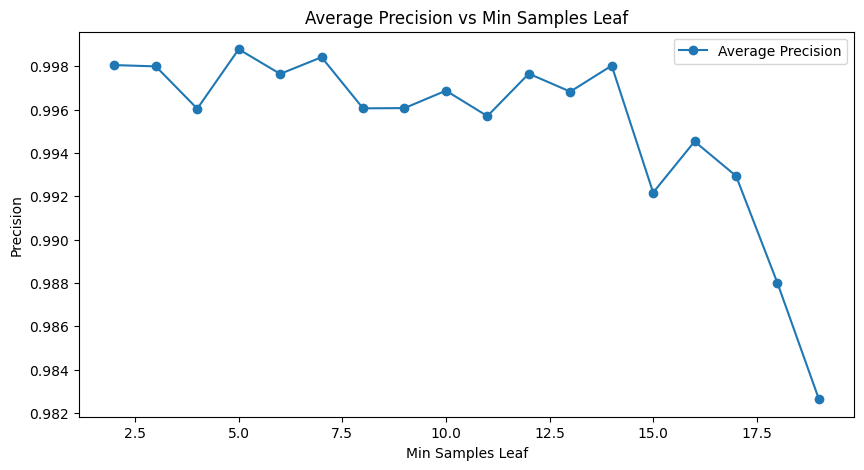

In [188]:
#Precision:
plt.figure(figsize=(10, 5))
plt.plot(min_samples_leaf_values, avg_precision_scores, 'o-', label='Average Precision')
plt.xlabel('Min Samples Leaf')
plt.ylabel('Precision')
plt.title('Average Precision vs Min Samples Leaf')
plt.legend()
plt.show()

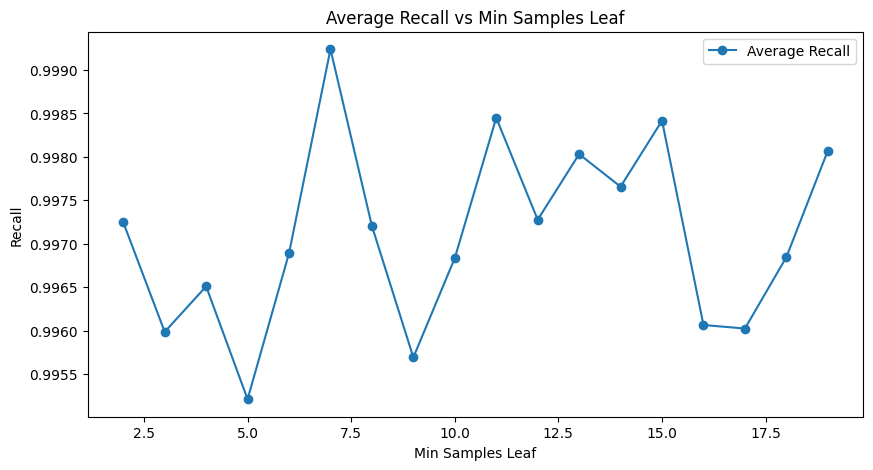

In [189]:
#Recall:
plt.figure(figsize=(10, 5))
plt.plot(min_samples_leaf_values, avg_recall_scores, 'o-', label='Average Recall')
plt.xlabel('Min Samples Leaf')
plt.ylabel('Recall')
plt.title('Average Recall vs Min Samples Leaf')
plt.legend()
plt.show()

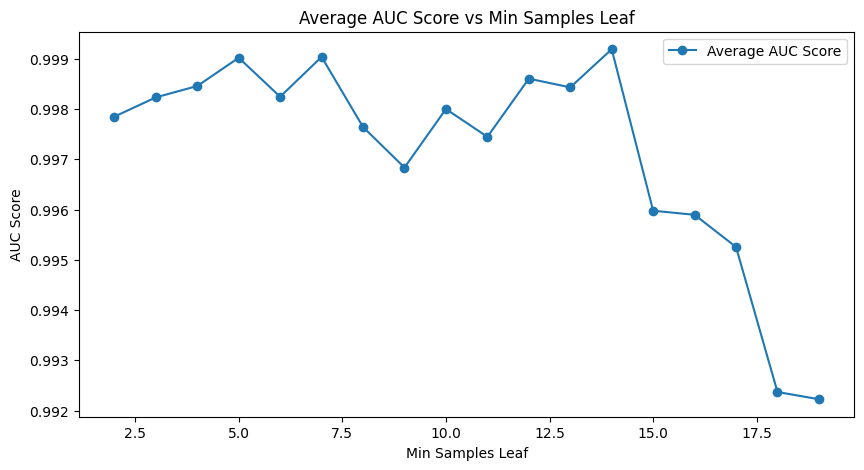

In [190]:
#AUC:
plt.figure(figsize=(10, 5))
plt.plot(min_samples_leaf_values, avg_auc_scores, 'o-', label='Average AUC Score')
plt.xlabel('Min Samples Leaf')
plt.ylabel('AUC Score')
plt.title('Average AUC Score vs Min Samples Leaf')
plt.legend()
plt.show()

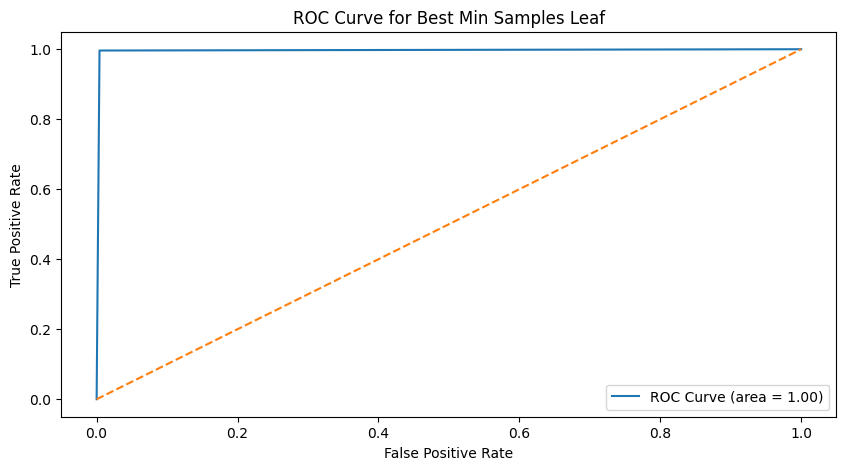

In [191]:
#ROC:
# Assuming best_min_samples_leaf is the value of min_samples_leaf that resulted in the highest average test accuracy
best_model = DecisionTreeClassifier(min_samples_leaf=best_min_samples_leaf)
best_model.fit(X_train, y_train)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 5))
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Best Min Samples Leaf')
plt.legend()
plt.show()


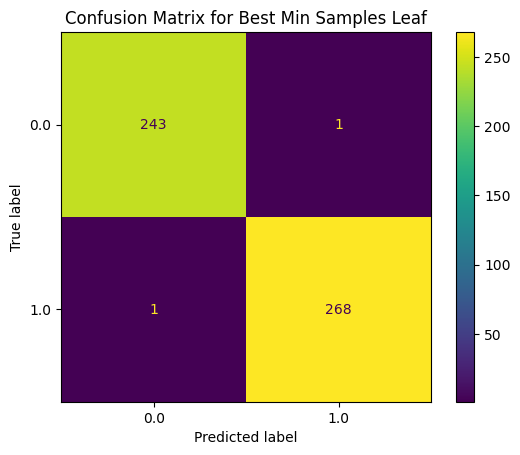

In [192]:
#Confusion Matrix:
from sklearn.metrics import ConfusionMatrixDisplay

best_model = DecisionTreeClassifier(min_samples_leaf=best_min_samples_leaf)
best_model.fit(X_train, y_train)
ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test)
plt.title('Confusion Matrix for Best Min Samples Leaf')
plt.show()


In [193]:
#ccp alpha
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix
import numpy as np

# Initialize lists to store the performance metrics
avg_train_acc = []
avg_test_acc = []
avg_node_count = []
best_accuracy = None
best_ccp_alpha = None

# Additional lists to store new performance metrics
avg_f1_scores = []
avg_precision_scores = []
avg_recall_scores = []
avg_auc_scores = []
confusion_matrices = []

# Create a list to store the range of ccp_alpha values
ccp_alpha_values = np.linspace(0, 0.01, 10)

for ccp_alpha in ccp_alpha_values:
    current_train_acc = []
    current_test_acc = []
    current_node_count = []
    current_f1_scores = []
    current_precision_scores = []
    current_recall_scores = []
    current_auc_scores = []
    current_confusion_matrices = []
    
    for _ in range(10):  # Run each configuration 10 times
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        DTclass = DecisionTreeClassifier(ccp_alpha=ccp_alpha)
        DTclass.fit(X_train, y_train)
        
        y_pred = DTclass.predict(X_test)
        y_pred_proba = DTclass.predict_proba(X_test)[:, 1]

        current_train_acc.append(DTclass.score(X_train, y_train))
        current_test_acc.append(DTclass.score(X_test, y_test))
        current_node_count.append(DTclass.tree_.node_count)
        current_f1_scores.append(f1_score(y_test, y_pred))
        current_precision_scores.append(precision_score(y_test, y_pred))
        current_recall_scores.append(recall_score(y_test, y_pred))
        current_auc_scores.append(roc_auc_score(y_test, y_pred_proba))
        current_confusion_matrices.append(confusion_matrix(y_test, y_pred))

    avg_train_acc.append(np.mean(current_train_acc))  
    avg_test_acc.append(np.mean(current_test_acc))
    avg_node_count.append(np.mean(current_node_count))
    avg_f1_scores.append(np.mean(current_f1_scores))
    avg_precision_scores.append(np.mean(current_precision_scores))
    avg_recall_scores.append(np.mean(current_recall_scores))
    avg_auc_scores.append(np.mean(current_auc_scores))
    confusion_matrices.append(current_confusion_matrices[np.argmax(current_test_acc)])
    
    # Update the best accuracy and ccp_alpha
    max_test_acc = np.max(current_test_acc)
    if best_accuracy is None or max_test_acc > best_accuracy:
        best_accuracy = max_test_acc
        best_ccp_alpha = ccp_alpha

print("The best ccp_alpha value:", best_ccp_alpha)
print("The best accuracy:", best_accuracy)

The best ccp_alpha value: 0.0
The best accuracy: 1.0


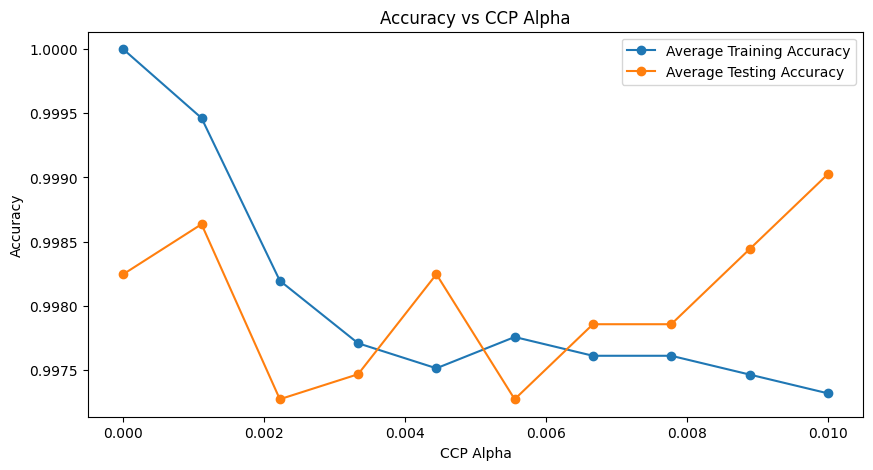

In [195]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(ccp_alpha_values, avg_train_acc, 'o-', label='Average Training Accuracy')
plt.plot(ccp_alpha_values, avg_test_acc, 'o-', label='Average Testing Accuracy')
plt.xlabel('CCP Alpha')
plt.ylabel('Accuracy')
plt.title('Accuracy vs CCP Alpha')
plt.legend()
plt.show()


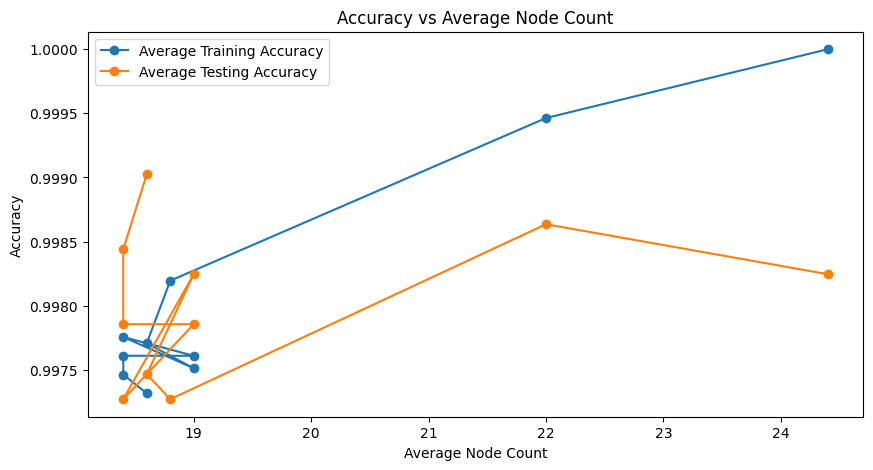

In [196]:
#Accuracy vs Avg Node Count:
plt.figure(figsize=(10, 5))
plt.plot(avg_node_count, avg_train_acc, 'o-', label='Average Training Accuracy')
plt.plot(avg_node_count, avg_test_acc, 'o-', label='Average Testing Accuracy')
plt.xlabel('Average Node Count')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Average Node Count')
plt.legend()
plt.show()


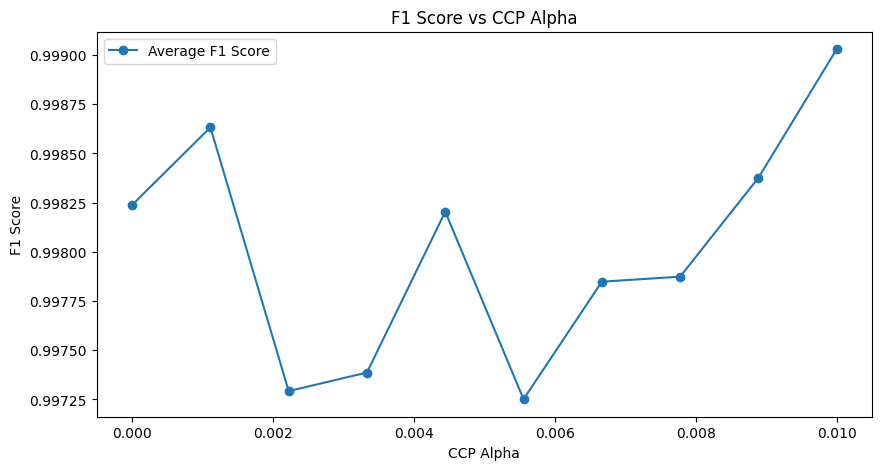

In [197]:
#F1 SCore:
plt.figure(figsize=(10, 5))
plt.plot(ccp_alpha_values, avg_f1_scores, 'o-', label='Average F1 Score')
plt.xlabel('CCP Alpha')
plt.ylabel('F1 Score')
plt.title('F1 Score vs CCP Alpha')
plt.legend()
plt.show()


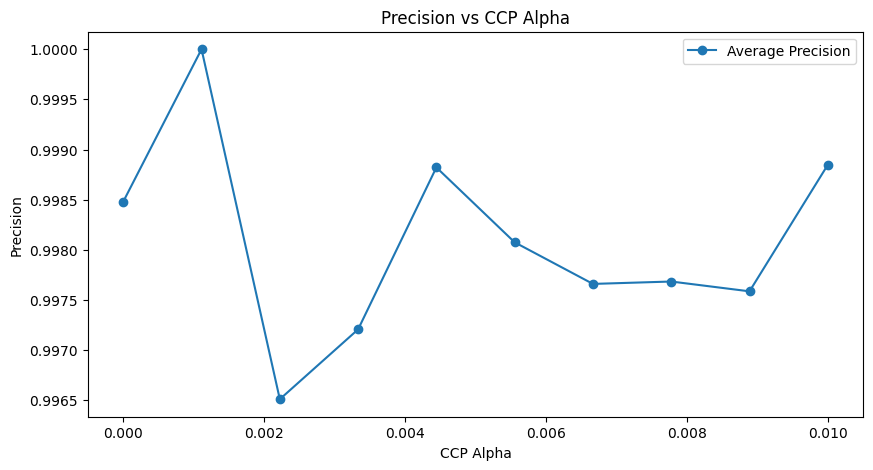

In [198]:
#Precision:
plt.figure(figsize=(10, 5))
plt.plot(ccp_alpha_values, avg_precision_scores, 'o-', label='Average Precision')
plt.xlabel('CCP Alpha')
plt.ylabel('Precision')
plt.title('Precision vs CCP Alpha')
plt.legend()
plt.show()


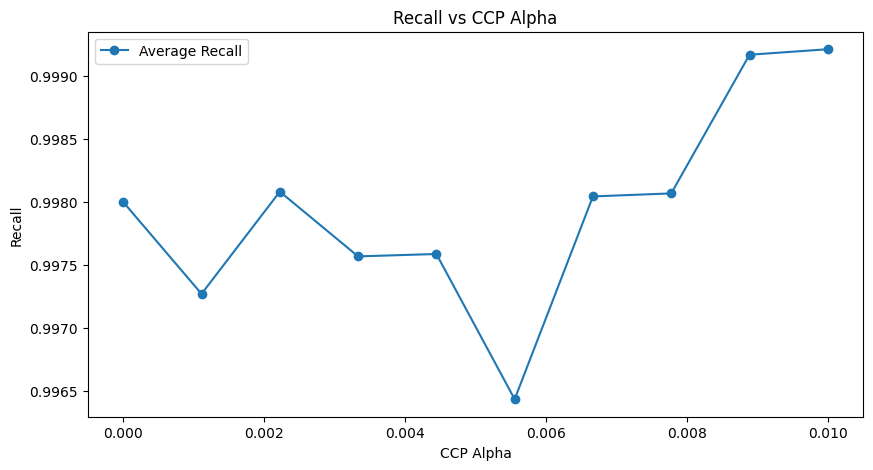

In [199]:
#Recall
plt.figure(figsize=(10, 5))
plt.plot(ccp_alpha_values, avg_recall_scores, 'o-', label='Average Recall')
plt.xlabel('CCP Alpha')
plt.ylabel('Recall')
plt.title('Recall vs CCP Alpha')
plt.legend()
plt.show()


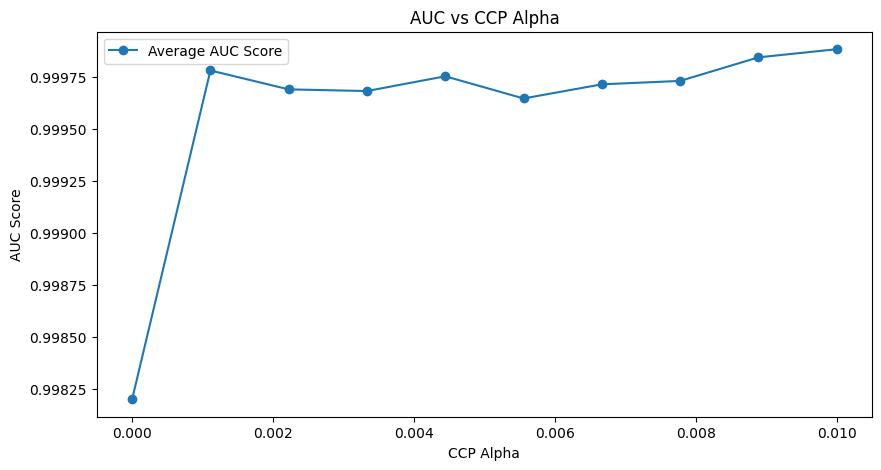

In [200]:
#AUC
plt.figure(figsize=(10, 5))
plt.plot(ccp_alpha_values, avg_auc_scores, 'o-', label='Average AUC Score')
plt.xlabel('CCP Alpha')
plt.ylabel('AUC Score')
plt.title('AUC vs CCP Alpha')
plt.legend()
plt.show()


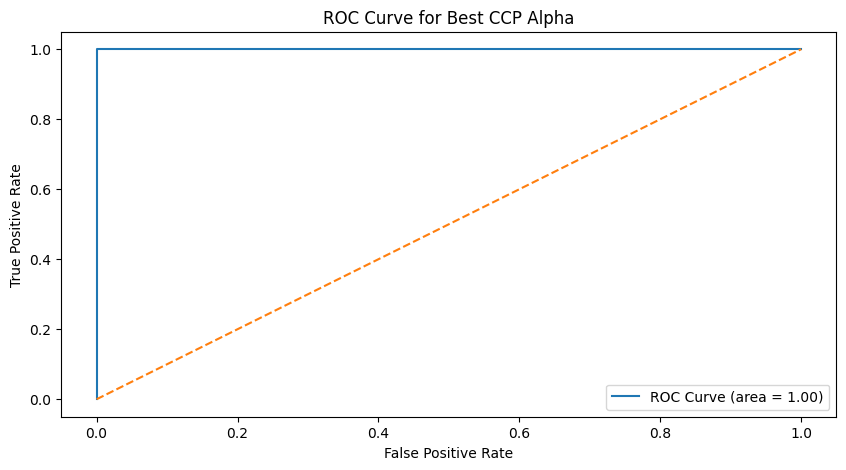

In [201]:
#ROC
from sklearn.metrics import roc_curve, auc

# Assuming best_ccp_alpha is the value of ccp_alpha that resulted in the highest average test accuracy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
best_model = DecisionTreeClassifier(ccp_alpha=best_ccp_alpha)
best_model.fit(X_train, y_train)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 5))
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Best CCP Alpha')
plt.legend()
plt.show()


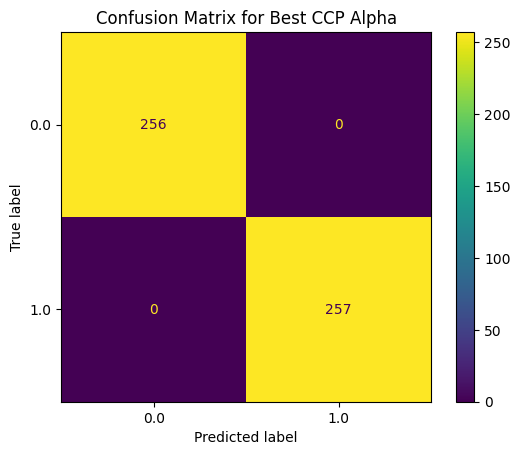

In [202]:
#Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay

best_model = DecisionTreeClassifier(ccp_alpha=best_ccp_alpha)
best_model.fit(X_train, y_train)
ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test)
plt.title('Confusion Matrix for Best CCP Alpha')
plt.show()


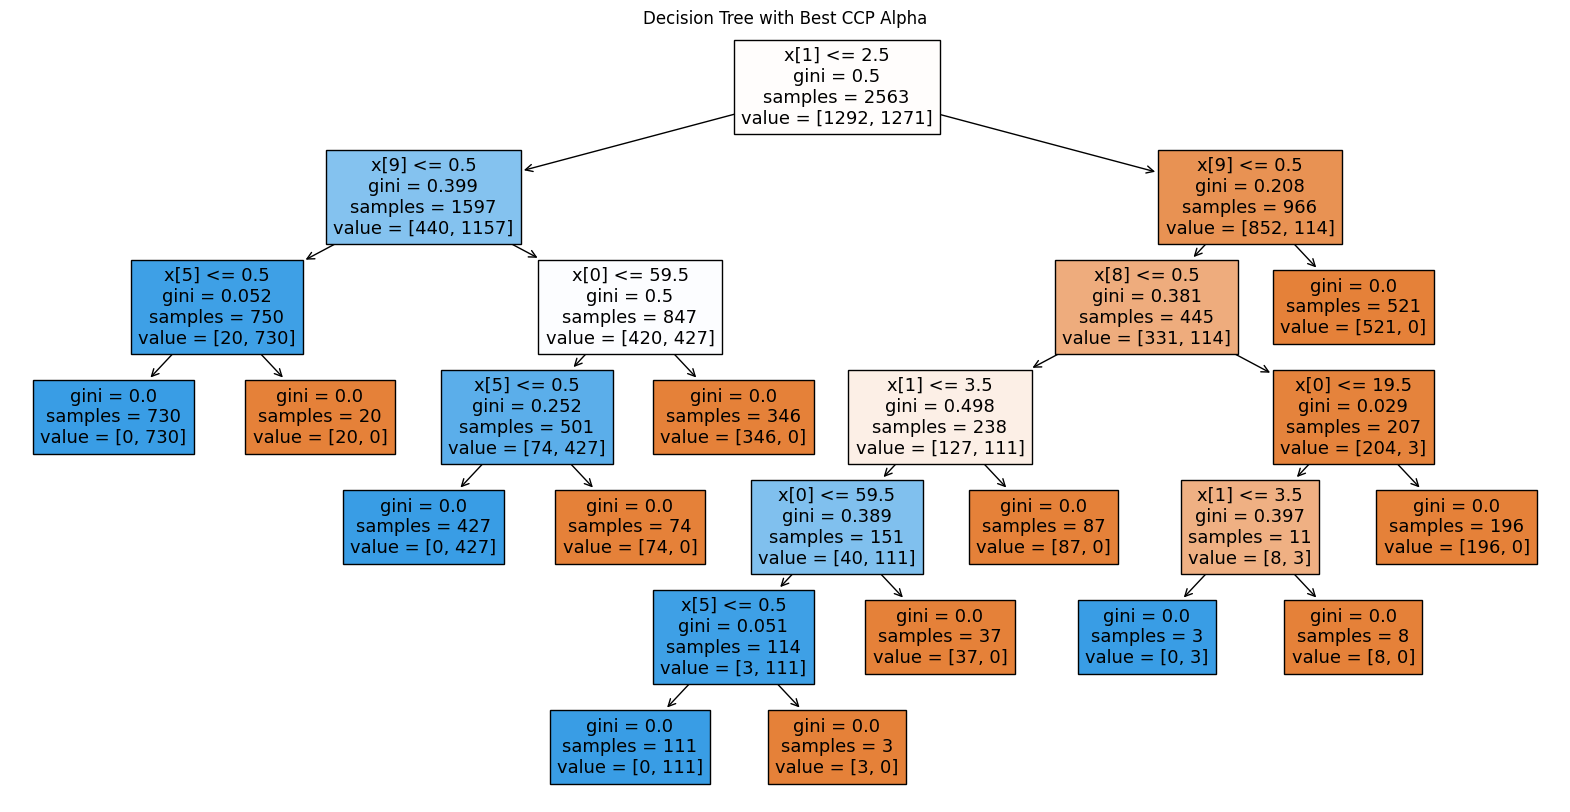

In [203]:
#Best CCP Alpha
from sklearn.tree import plot_tree, DecisionTreeClassifier

best_ccp_alpha_model = DecisionTreeClassifier(ccp_alpha=0.0)
best_ccp_alpha_model.fit(X, y)

plt.figure(figsize=(20, 10))
plot_tree(best_ccp_alpha_model, filled=True)
plt.title('Decision Tree with Best CCP Alpha')
plt.show()


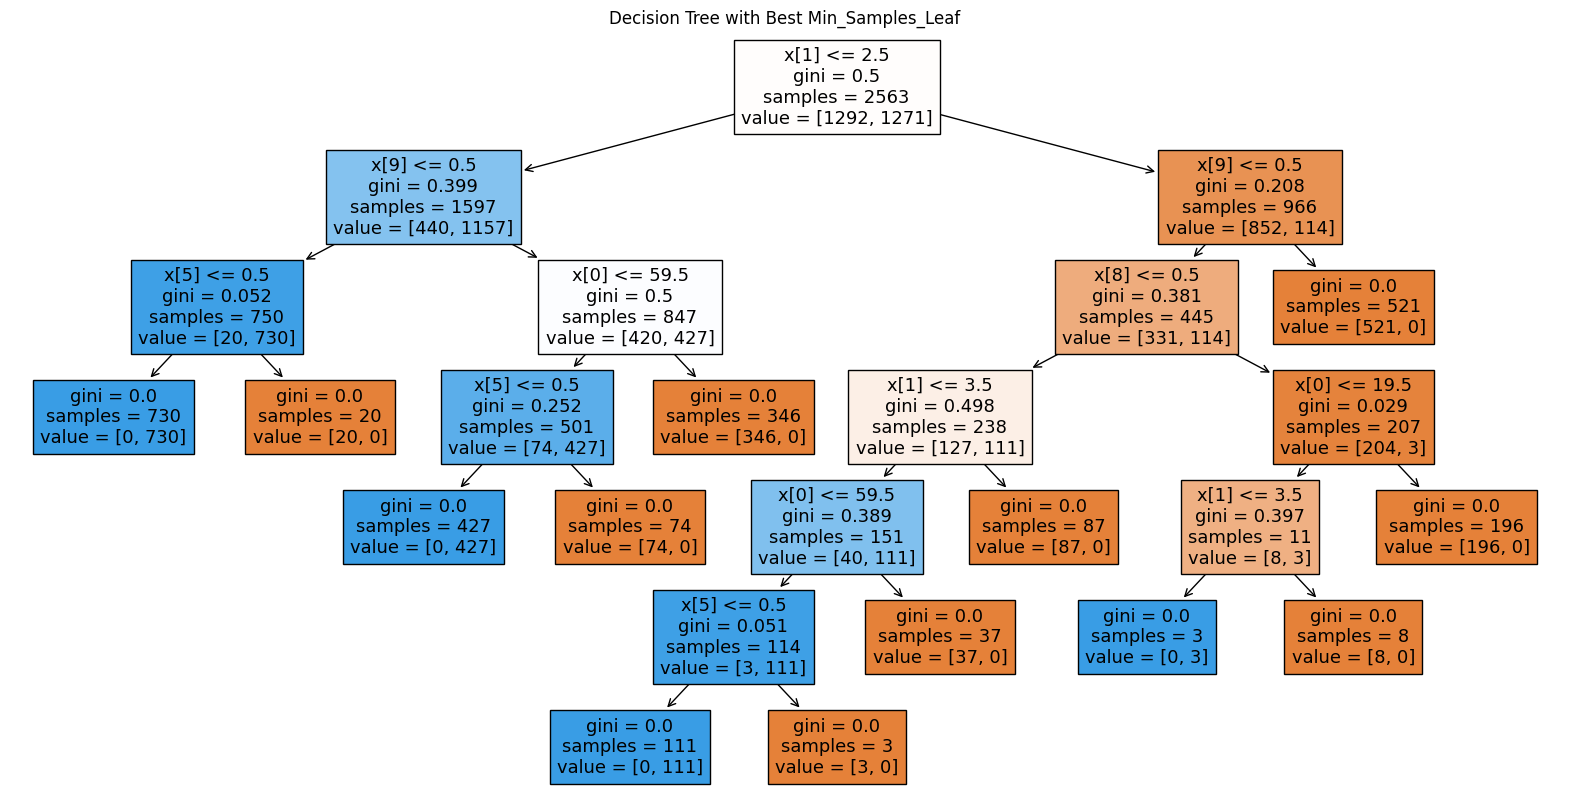

In [204]:
#Best Min_Samples_Leaf
best_min_samples_leaf_model = DecisionTreeClassifier(min_samples_leaf=2)
best_min_samples_leaf_model.fit(X, y)

plt.figure(figsize=(20, 10))
plot_tree(best_min_samples_leaf_model, filled=True)
plt.title('Decision Tree with Best Min_Samples_Leaf')
plt.show()


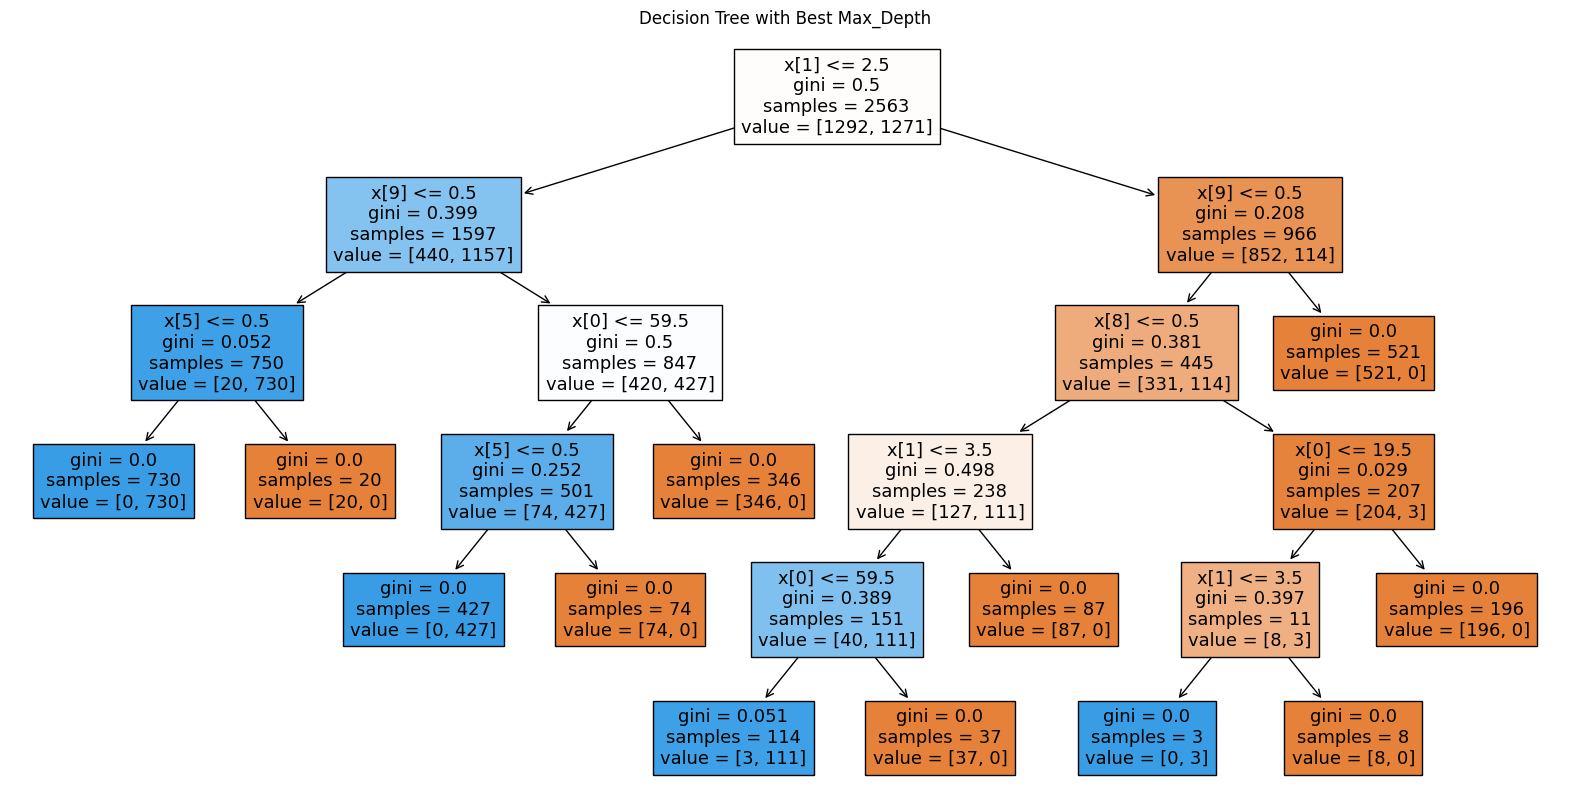

In [205]:
#Best Max_Depth
best_max_depth_model = DecisionTreeClassifier(max_depth=5)
best_max_depth_model.fit(X, y)

plt.figure(figsize=(20, 10))
plot_tree(best_max_depth_model, filled=True)
plt.title('Decision Tree with Best Max_Depth')
plt.show()

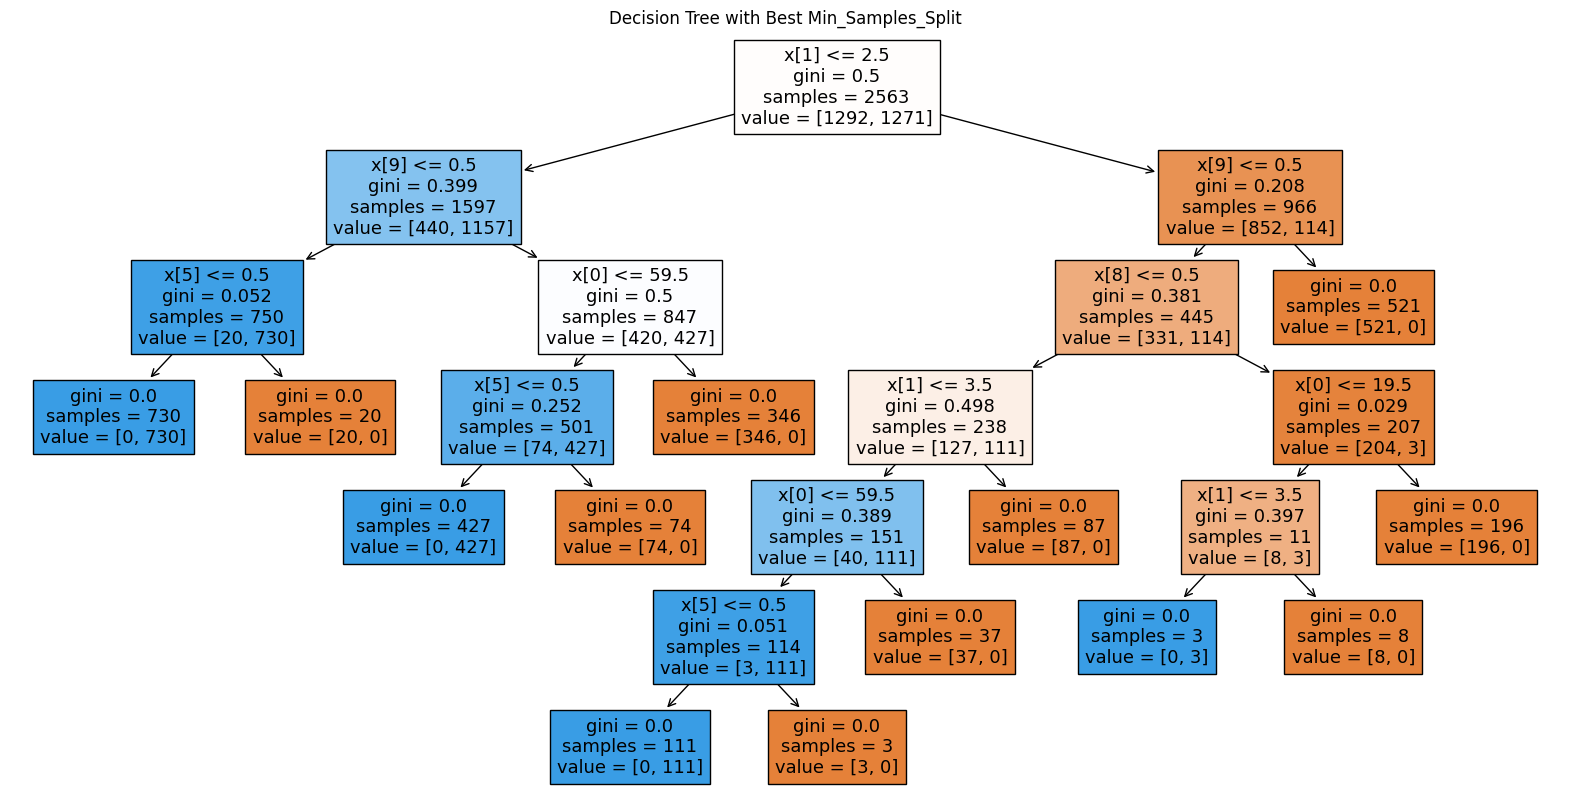

In [ ]:
#Best Min_Samples_Split
best_min_samples_split_model = DecisionTreeClassifier(min_samples_split=2)
best_min_samples_split_model.fit(X, y)

plt.figure(figsize=(20, 10))
plot_tree(best_min_samples_split_model, filled=True)
plt.title('Decision Tree with Best Min_Samples_Split')
plt.show()

In [208]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix
import numpy as np

# Initialize lists to store the performance metrics
avg_train_acc = []
avg_test_acc = []
best_accuracy = None
best_n_neighbors = None

# Additional lists to store new performance metrics
f1_scores = []
precision_scores = []
recall_scores = []
auc_scores = []
confusion_matrices = []

# Create a list to store the range of n_neighbors values
n_neighbors_values = range(1, 1000, 50)  # Sensible range for n_neighbors

for n_neighbors in n_neighbors_values:
    current_train_acc = []
    current_test_acc = []
    current_f1_scores = []
    current_precision_scores = []
    current_recall_scores = []
    current_auc_scores = []
    current_confusion_matrices = []
    
    for _ in range(10):  # Run each configuration 10 times for stability
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        knn = KNeighborsClassifier(n_neighbors=n_neighbors)
        knn.fit(X_train, y_train)
        
        y_pred = knn.predict(X_test)
        y_pred_proba = knn.predict_proba(X_test)[:, 1]  # Probability of positive class

        current_train_acc.append(knn.score(X_train, y_train))
        current_test_acc.append(knn.score(X_test, y_test))
        current_f1_scores.append(f1_score(y_test, y_pred))
        current_precision_scores.append(precision_score(y_test, y_pred))
        current_recall_scores.append(recall_score(y_test, y_pred))
        current_auc_scores.append(roc_auc_score(y_test, y_pred_proba))
        current_confusion_matrices.append(confusion_matrix(y_test, y_pred))

    avg_train_acc.append(np.mean(current_train_acc))
    avg_test_acc.append(np.mean(current_test_acc))
    f1_scores.append(np.mean(current_f1_scores))
    precision_scores.append(np.mean(current_precision_scores))
    recall_scores.append(np.mean(current_recall_scores))
    auc_scores.append(np.mean(current_auc_scores))
    
    # Update the best accuracy and n_neighbors
    max_test_acc = np.max(current_test_acc)
    if best_accuracy is None or max_test_acc > best_accuracy:
        best_accuracy = max_test_acc
        best_n_neighbors = n_neighbors

print("The best n neighbors:", best_n_neighbors)
print("The best accuracy:", best_accuracy)


The best n neighbors: 351
The best accuracy: 0.5906432748538012


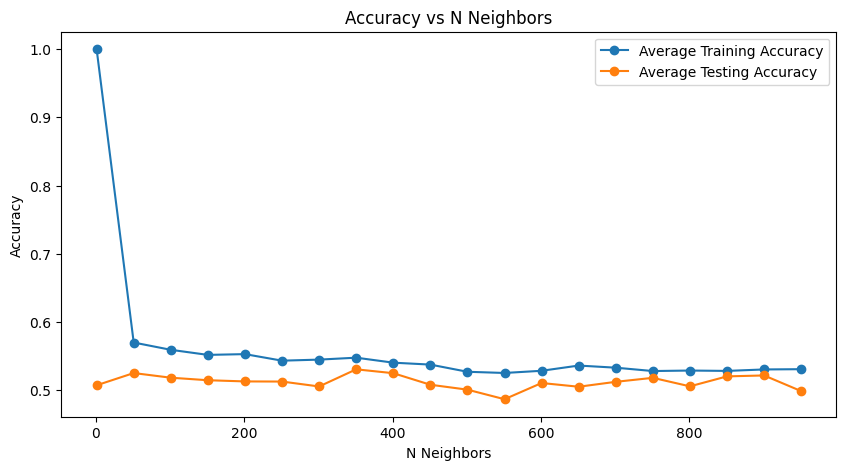

In [210]:
plt.figure(figsize=(10, 5))
plt.plot(n_neighbors_values, avg_train_acc, 'o-', label='Average Training Accuracy')
plt.plot(n_neighbors_values, avg_test_acc, 'o-', label='Average Testing Accuracy')
plt.xlabel('N Neighbors')
plt.ylabel('Accuracy')
plt.title('Accuracy vs N Neighbors')
plt.legend()
plt.show()


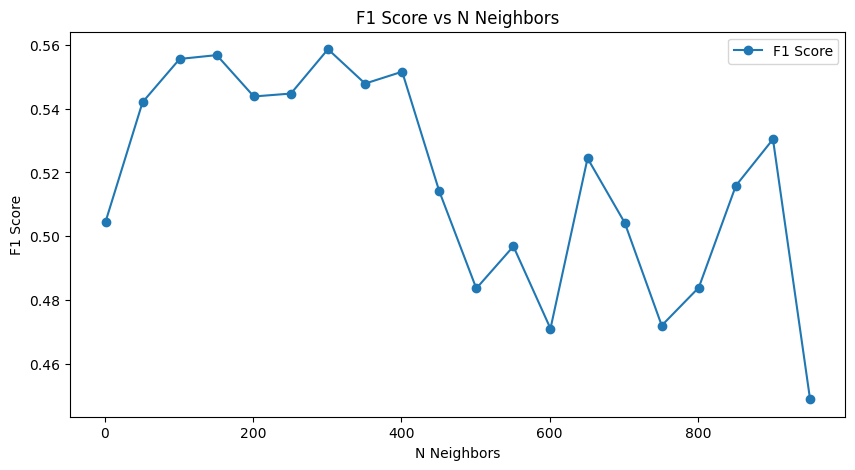

In [211]:
plt.figure(figsize=(10, 5))
plt.plot(n_neighbors_values, f1_scores, 'o-', label='F1 Score')
plt.xlabel('N Neighbors')
plt.ylabel('F1 Score')
plt.title('F1 Score vs N Neighbors')
plt.legend()
plt.show()

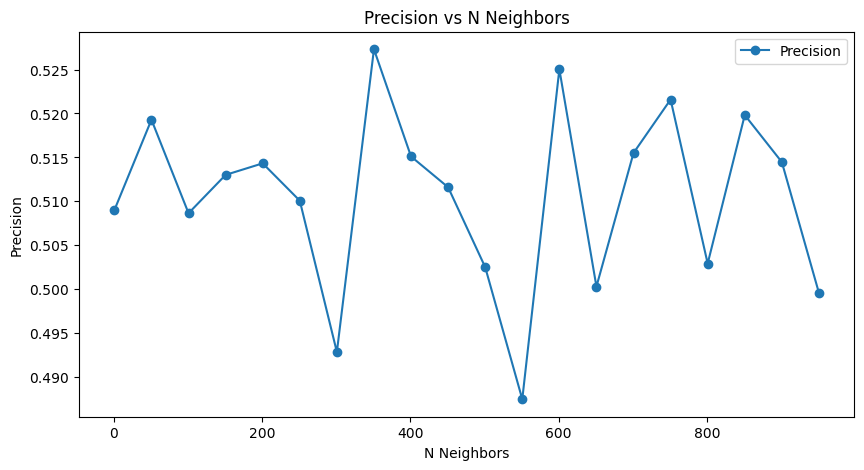

In [212]:
plt.figure(figsize=(10, 5))
plt.plot(n_neighbors_values, precision_scores, 'o-', label='Precision')
plt.xlabel('N Neighbors')
plt.ylabel('Precision')
plt.title('Precision vs N Neighbors')
plt.legend()
plt.show()


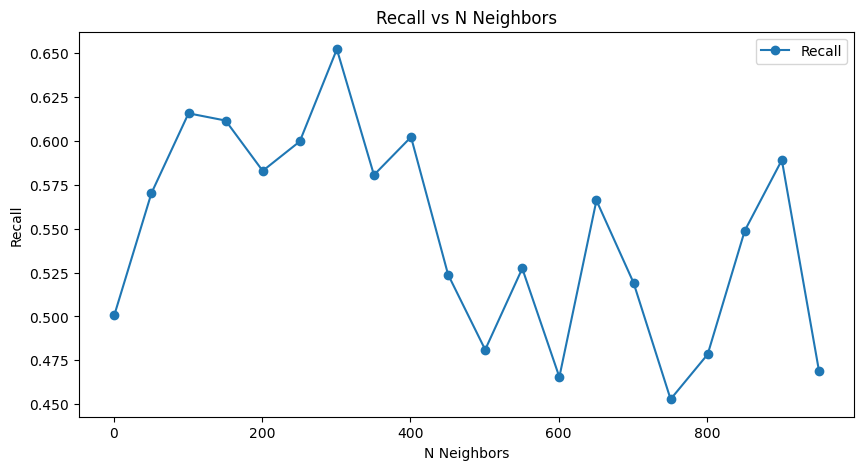

In [213]:
plt.figure(figsize=(10, 5))
plt.plot(n_neighbors_values, recall_scores, 'o-', label='Recall')
plt.xlabel('N Neighbors')
plt.ylabel('Recall')
plt.title('Recall vs N Neighbors')
plt.legend()
plt.show()


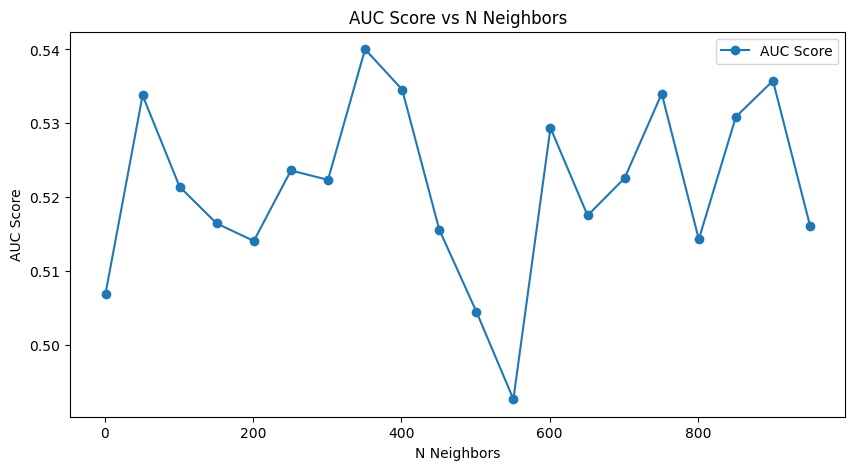

In [214]:
plt.figure(figsize=(10, 5))
plt.plot(n_neighbors_values, auc_scores, 'o-', label='AUC Score')
plt.xlabel('N Neighbors')
plt.ylabel('AUC Score')
plt.title('AUC Score vs N Neighbors')
plt.legend()
plt.show()


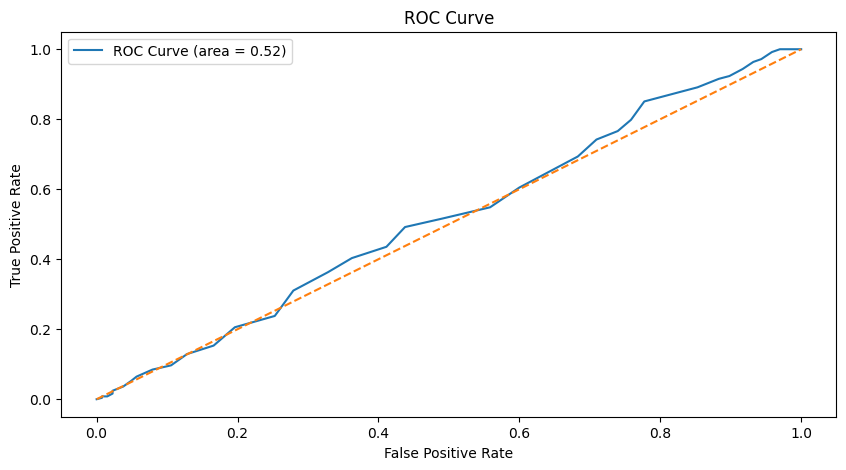

In [215]:
from sklearn.metrics import roc_curve, auc

best_knn = KNeighborsClassifier(n_neighbors=best_n_neighbors)
best_knn.fit(X_train, y_train)
y_pred_proba = best_knn.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 5))
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


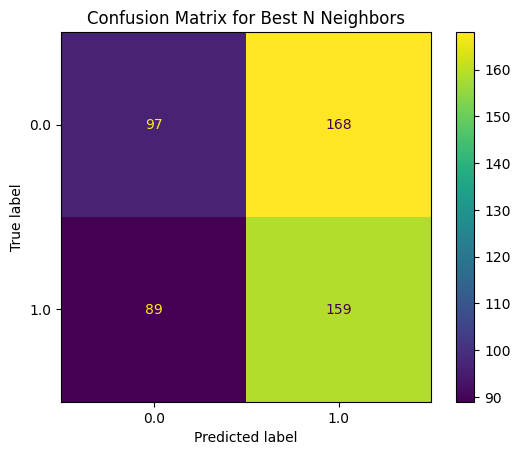

In [216]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(best_knn, X_test, y_test)
plt.title('Confusion Matrix for Best N Neighbors')
plt.show()


In [230]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix
import numpy as np

# Initialize lists to store the performance metrics
avg_train_acc = []
avg_test_acc = []
best_var_smoothing_value = None
best_accuracy = None

# Additional lists to store new performance metrics
f1_scores = []
precision_scores = []
recall_scores = []
auc_scores = []
confusion_matrices = []

# values for var_smoothing
var_smoothing_values = np.logspace(-10, -2, 100)  # 100 values from 10^-10 to 10^-2

for var_smoothing in var_smoothing_values:
    current_train_acc = []
    current_test_acc = []
    current_f1_scores = []
    current_precision_scores = []
    current_recall_scores = []
    current_auc_scores = []
    current_confusion_matrices = []
    
    for _ in range(10):  # Run each configuration 10 times
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        gnb = GaussianNB(var_smoothing=var_smoothing)
        gnb.fit(X_train, y_train)
        
        y_pred = gnb.predict(X_test)
        y_pred_proba = gnb.predict_proba(X_test)[:, 1]  # Probability of positive class

        current_train_acc.append(accuracy_score(y_train, gnb.predict(X_train)))
        current_test_acc.append(accuracy_score(y_test, y_pred))
        current_f1_scores.append(f1_score(y_test, y_pred))
        current_precision_scores.append(precision_score(y_test, y_pred))
        current_recall_scores.append(recall_score(y_test, y_pred))
        current_auc_scores.append(roc_auc_score(y_test, y_pred_proba))
        current_confusion_matrices.append(confusion_matrix(y_test, y_pred))

    avg_train_acc.append(np.mean(current_train_acc))
    avg_test_acc.append(np.mean(current_test_acc))
    f1_scores.append(np.mean(current_f1_scores))
    precision_scores.append(np.mean(current_precision_scores))
    recall_scores.append(np.mean(current_recall_scores))
    auc_scores.append(np.mean(current_auc_scores))
    confusion_matrices.append(current_confusion_matrices[np.argmax(current_test_acc)])
    
    # Update the best accuracy and var_smoothing
    if best_accuracy is None or np.mean(current_test_acc) > best_accuracy:
        best_accuracy = np.mean(current_test_acc)
        best_var_smoothing_value = var_smoothing

print("The best var_smoothing value:", best_var_smoothing_value)
print("The best accuracy:", best_accuracy)


The best var_smoothing value: 4.534878508128591e-05
The best accuracy: 0.8791423001949317


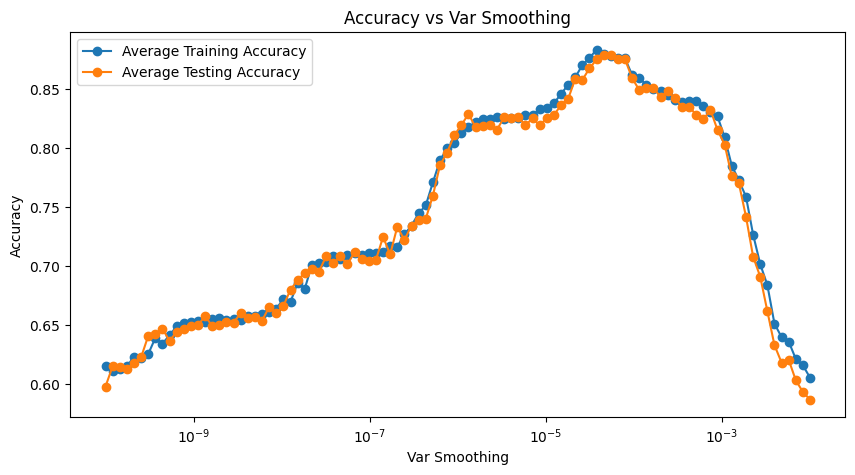

In [231]:
plt.figure(figsize=(10, 5))
plt.plot(var_smoothing_values, avg_train_acc, 'o-', label='Average Training Accuracy')
plt.plot(var_smoothing_values, avg_test_acc, 'o-', label='Average Testing Accuracy')
plt.xscale('log')  # Since var_smoothing_values are on a log scale
plt.xlabel('Var Smoothing')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Var Smoothing')
plt.legend()
plt.show()

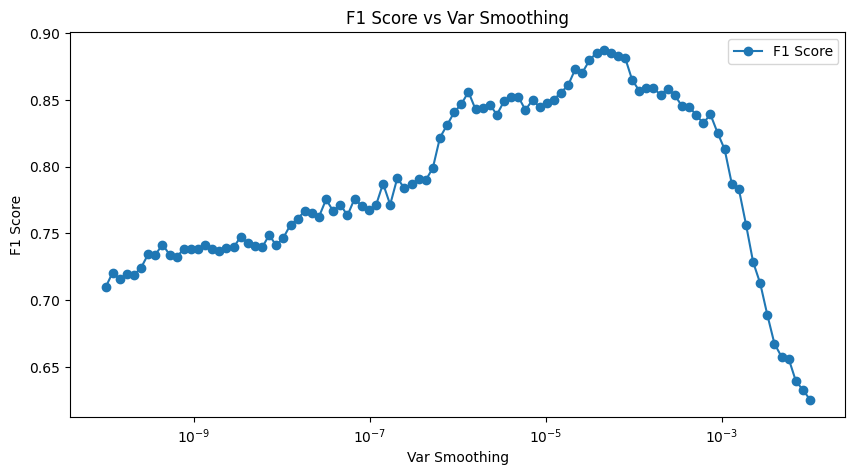

In [232]:
plt.figure(figsize=(10, 5))
plt.plot(var_smoothing_values, f1_scores, 'o-', label='F1 Score')
plt.xscale('log')
plt.xlabel('Var Smoothing')
plt.ylabel('F1 Score')
plt.title('F1 Score vs Var Smoothing')
plt.legend()
plt.show()


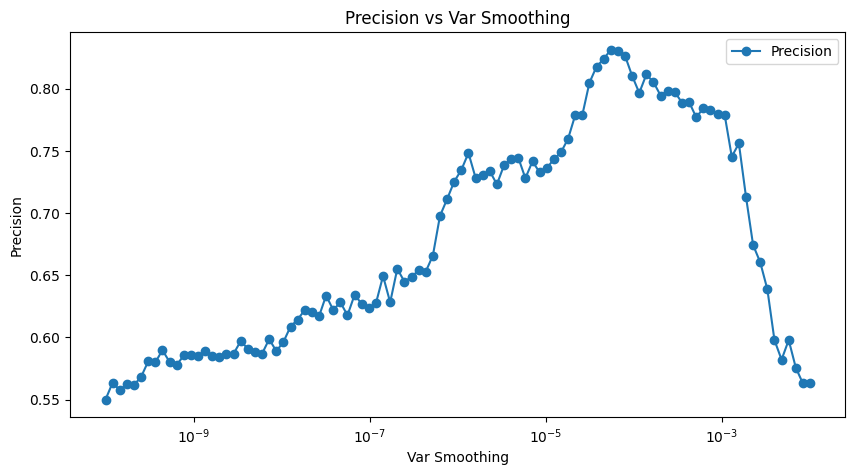

In [233]:
plt.figure(figsize=(10, 5))
plt.plot(var_smoothing_values, precision_scores, 'o-', label='Precision')
plt.xscale('log')
plt.xlabel('Var Smoothing')
plt.ylabel('Precision')
plt.title('Precision vs Var Smoothing')
plt.legend()
plt.show()


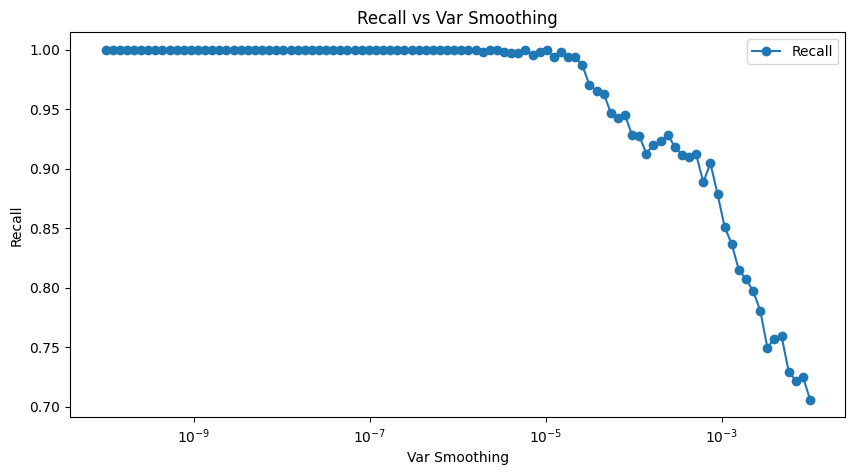

In [234]:
plt.figure(figsize=(10, 5))
plt.plot(var_smoothing_values, recall_scores, 'o-', label='Recall')
plt.xscale('log')
plt.xlabel('Var Smoothing')
plt.ylabel('Recall')
plt.title('Recall vs Var Smoothing')
plt.legend()
plt.show()


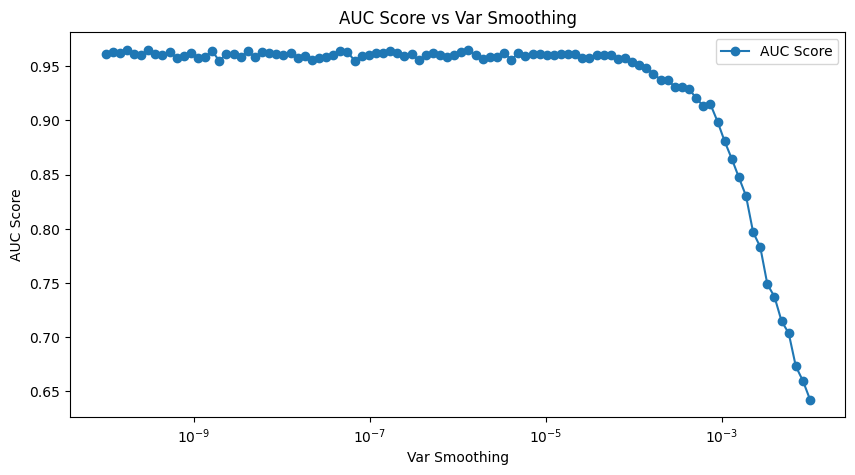

In [235]:
plt.figure(figsize=(10, 5))
plt.plot(var_smoothing_values, auc_scores, 'o-', label='AUC Score')
plt.xscale('log')
plt.xlabel('Var Smoothing')
plt.ylabel('AUC Score')
plt.title('AUC Score vs Var Smoothing')
plt.legend()
plt.show()


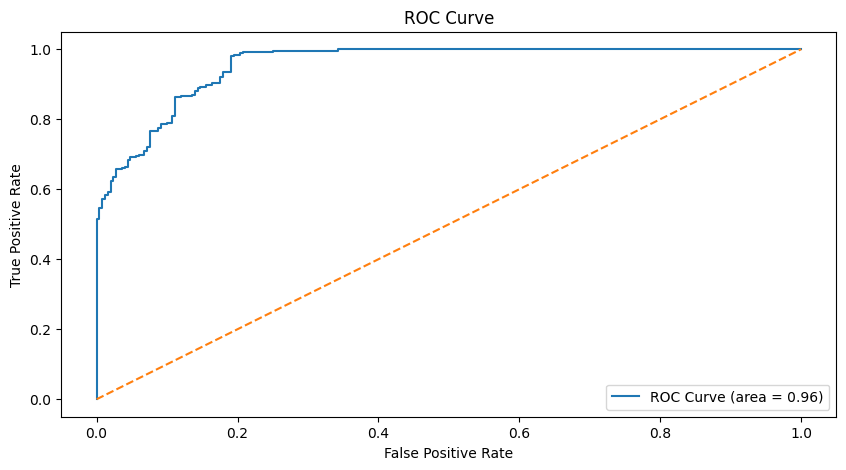

In [236]:
from sklearn.metrics import roc_curve, auc

best_gnb = GaussianNB(var_smoothing=best_var_smoothing_value)
best_gnb.fit(X_train, y_train)
y_pred_proba = best_gnb.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 5))
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


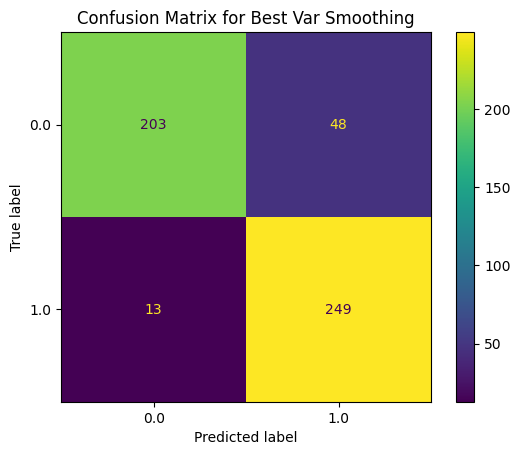

In [237]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(best_gnb, X_test, y_test)
plt.title('Confusion Matrix for Best Var Smoothing')
plt.show()


In [37]:
from sklearn.svm import SVC
train_acc1 = []
test_acc1 = []
avg_train_acc1 = []
avg_test_acc1 = []
avg_C = []
best_C = None
best_C_index = None

for i in range(2, 100, 10):
    test_acc1 = []
    for j in range(20): 
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        svc = SVC(C=i)
        svc.fit(X_train, y_train)

        train_acc1.append(svc.score(X_train, y_train))
        test_acc1.append(svc.score(X_test, y_test))

    avg_train_acc1.append(np.mean(train_acc1))
    avg_test_acc1.append(np.mean(test_acc1))
    avg_C.append(np.mean(i))
    max_test_acc_index = np.argmax(test_acc1)

    if best_C is None or test_acc1[max_test_acc_index] > best_C:
        best_C = test_acc1[max_test_acc_index]
        best_C_index = i

print("The best C index:", best_C_index)
print("The best C:", best_C)

The best C index: 92
The best C: 0.8674463937621832


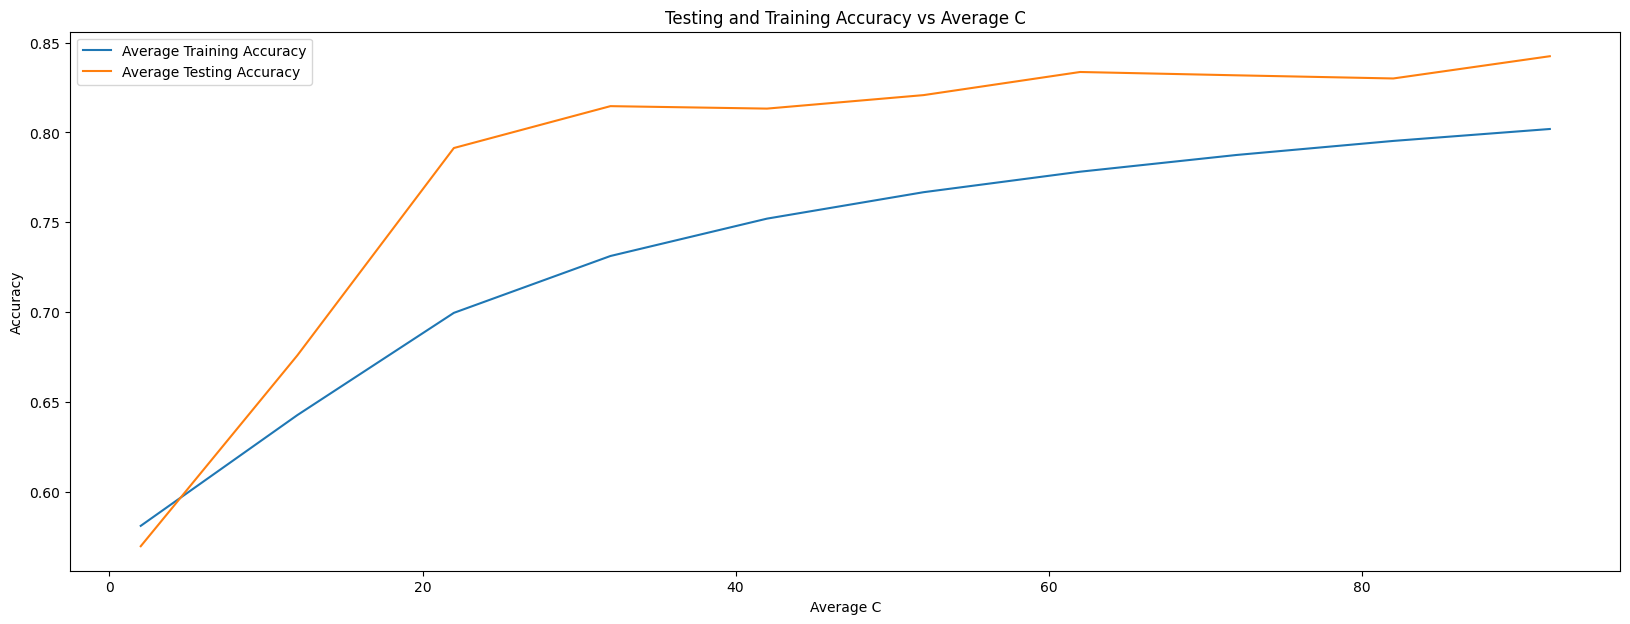

In [38]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 7))
plt.plot(avg_C, avg_train_acc1, label='Average Training Accuracy')
plt.plot(avg_C, avg_test_acc1, label='Average Testing Accuracy')
plt.xlabel('Average C')
plt.ylabel('Accuracy')
plt.title('Testing and Training Accuracy vs Average C')
plt.legend()
plt.show()

In [39]:
train_acc1 = []
test_acc1 = []
avg_train_acc1 = []
avg_test_acc1 = []
avg_gamma = []
best_gamma = None
best_gamma_index = None
gamma_values = [1, 10, 100]
for gamma in gamma_values:
    test_acc1 = []
    for j in range(20): 
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        svc = SVC(gamma = gamma)
        svc.fit(X_train, y_train)

        train_acc1.append(svc.score(X_train, y_train))
        test_acc1.append(svc.score(X_test, y_test))

    avg_train_acc1.append(np.mean(train_acc1))
    avg_test_acc1.append(np.mean(test_acc1))
    avg_gamma.append(np.mean(gamma))
    max_test_acc_index = np.argmax(test_acc1)

    if best_gamma is None or test_acc1[max_test_acc_index] > best_gamma:
        best_gamma = test_acc1[max_test_acc_index]
        best_gamma_index = i

print("The best gamma index:", best_gamma_index)
print("The best gamma:", best_gamma)

The best gamma index: 92
The best gamma: 0.5185185185185185


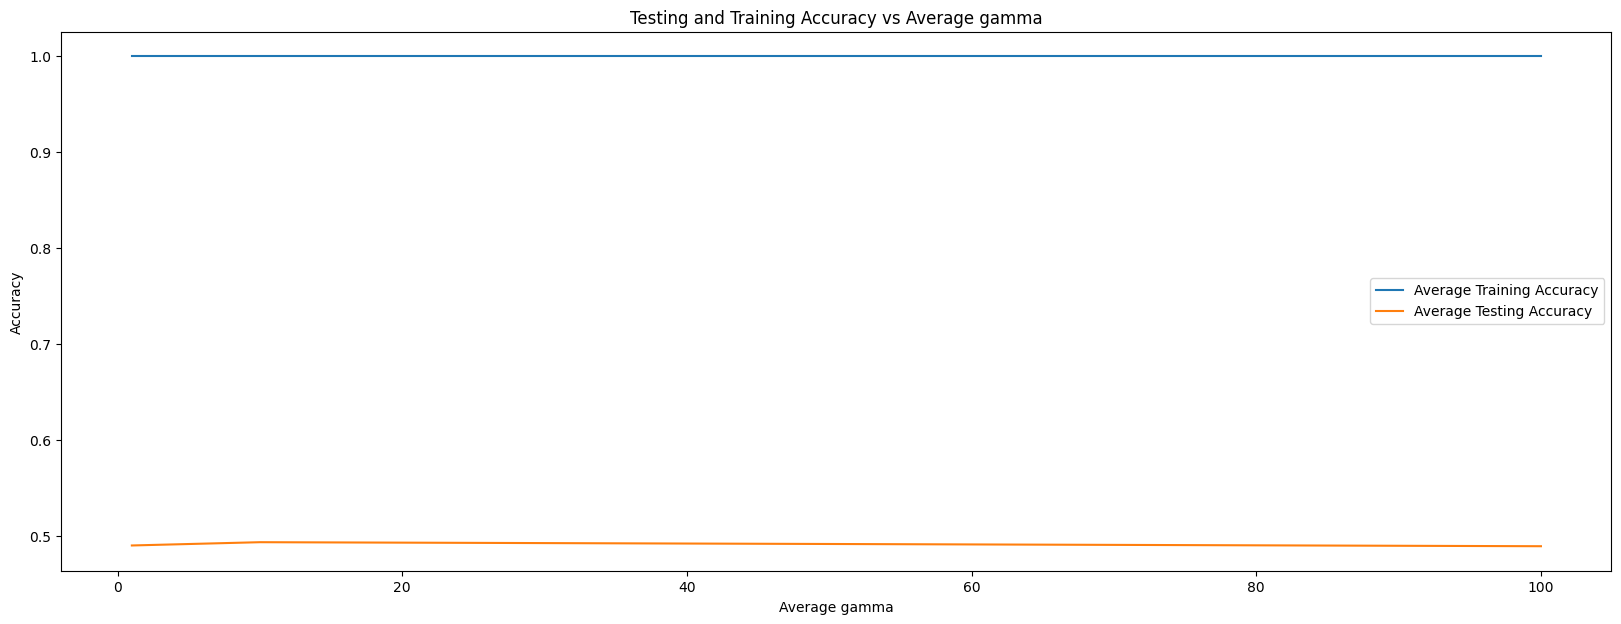

In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 7))
plt.plot(avg_gamma, avg_train_acc1, label='Average Training Accuracy')
plt.plot(avg_gamma, avg_test_acc1, label='Average Testing Accuracy')
plt.xlabel('Average gamma')
plt.ylabel('Accuracy')
plt.title('Testing and Training Accuracy vs Average gamma')
plt.legend()
plt.show()

In [41]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X_new = SelectKBest(chi2, k=3).fit_transform(X, y) 
X_new.shape 

(2563, 3)

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

train_acc1 = []
test_acc1 = []
Node_count = []
avg_train_acc1 = []
avg_test_acc1 = []
avg_node_count = []
best_minsamples = None
best_minsamples_index = None  

for i in range(2, 2000, 100):
    # Reset the test_acc1 list for each i
    test_acc1 = []
    
    for j in range(1, 10):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        DTclass = DecisionTreeClassifier(min_samples_split=i)
        DTclass.fit(X_train, y_train)

        train_acc1.append(DTclass.score(X_train, y_train))
        test_acc1.append(DTclass.score(X_test, y_test))
        Node_count.append(DTclass.tree_.node_count)

    avg_train_acc1.append(np.mean(train_acc1))  
    avg_test_acc1.append(np.mean(test_acc1))
    avg_node_count.append(np.mean(Node_count))
    
    # Find the index corresponding to the maximum test accuracy for each i
    max_test_acc_index = np.argmax(test_acc1)
    
    if best_minsamples is None or test_acc1[max_test_acc_index] > best_minsamples:
        best_minsamples = test_acc1[max_test_acc_index]
        best_minsamples_index = i

print("The best min samples index:", best_minsamples_index)
print("The best min samples:", best_minsamples)

The best min samples index: 2
The best min samples: 1.0


In [43]:
# max_depth
train_acc1 = []
test_acc1 = []
Node_count = []
avg_train_acc1 = []
avg_test_acc1 = []
avg_node_count = []
best_maxdepth = None
best_maxdepth_index = None  

for i in range(2, 2000, 100):
    # Reset the test_acc1 list for each i
    test_acc1 = []
    
    for j in range(1, 10):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        DTclass = DecisionTreeClassifier(max_depth= i)
        DTclass.fit(X_train, y_train)

        train_acc1.append(DTclass.score(X_train, y_train))
        test_acc1.append(DTclass.score(X_test, y_test))
        Node_count.append(DTclass.tree_.node_count)

    avg_train_acc1.append(np.mean(train_acc1))  
    avg_test_acc1.append(np.mean(test_acc1))
    avg_node_count.append(np.mean(Node_count))
    
    # Find the index corresponding to the maximum test accuracy for each i
    max_test_acc_index = np.argmax(test_acc1)
    
    if best_maxdepth is None or test_acc1[max_test_acc_index] > best_maxdepth:
        best_maxdepth = test_acc1[max_test_acc_index]
        best_maxdepth_index = i

print("The best max depth index:", best_maxdepth_index)
print("The best max depth:", best_maxdepth)

The best max depth index: 102
The best max depth: 1.0


In [44]:
# min samples leaf
train_acc1 = []
test_acc1 = []
Node_count = []
avg_train_acc1 = []
avg_test_acc1 = []
avg_node_count = []
best_minsamplesleaf = None
best_minsamplesleaf_index = None  

for i in range(2, 2000, 100):
    # Reset the test_acc1 list for each i
    test_acc1 = []
    
    for j in range(1, 10):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        DTclass = DecisionTreeClassifier(min_samples_leaf=i)
        DTclass.fit(X_train, y_train)

        train_acc1.append(DTclass.score(X_train, y_train))
        test_acc1.append(DTclass.score(X_test, y_test))
        Node_count.append(DTclass.tree_.node_count)

    avg_train_acc1.append(np.mean(train_acc1))  
    avg_test_acc1.append(np.mean(test_acc1))
    avg_node_count.append(np.mean(Node_count))
    
    # Find the index corresponding to the maximum test accuracy for each i
    max_test_acc_index = np.argmax(test_acc1)
    
    if best_minsamplesleaf is None or test_acc1[max_test_acc_index] > best_minsamplesleaf:
        best_minsamplesleaf = test_acc1[max_test_acc_index]
        best_minsamplesleaf_index = i

print("The best min samplesleaf index:", best_minsamplesleaf_index)
print("The best min samplesleaf:", best_minsamplesleaf)

The best min samplesleaf index: 2
The best min samplesleaf: 1.0


In [45]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

train_acc1 = []
test_acc1 = []
Node_count = []
avg_train_acc1 = []
avg_test_acc1 = []
avg_node_count = []
best_ccp_alpha = None
best_ccp_alpha_index = None  

for ccp_alpha in np.linspace(0, 0.01, 10): 
    test_acc1 = []
    
    for j in range(1, 10):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        DTclass = DecisionTreeClassifier(ccp_alpha=ccp_alpha)
        DTclass.fit(X_train, y_train)

        train_acc1.append(DTclass.score(X_train, y_train))
        test_acc1.append(DTclass.score(X_test, y_test))
        Node_count.append(DTclass.tree_.node_count)

    avg_train_acc1.append(np.mean(train_acc1))  
    avg_test_acc1.append(np.mean(test_acc1))
    avg_node_count.append(np.mean(Node_count))
    
    max_test_acc_index = np.argmax(test_acc1)
    
    if best_ccp_alpha is None or test_acc1[max_test_acc_index] > best_ccp_alpha:
        best_ccp_alpha = test_acc1[max_test_acc_index]
        best_ccp_alpha_index = ccp_alpha

print("The best ccp_alpha index:", best_ccp_alpha_index)
print("The best ccp_alpha:", best_ccp_alpha)

The best ccp_alpha index: 0.0
The best ccp_alpha: 1.0


In [46]:
from sklearn.neighbors import KNeighborsClassifier
train_acc1 = []
test_acc1 = []
avg_train_acc1 = []
avg_test_acc1 = []
avg_n_neighbors = []
best_nneighbors = None
best_nneighbors_index = None
for i in range(2, 1000, 100):
    test_acc1 = []
    for j in range(1, 10):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(X_train, y_train)

        train_acc1.append(knn.score(X_train, y_train))
        test_acc1.append(knn.score(X_test, y_test))

    avg_train_acc1.append(np.mean(train_acc1))
    avg_test_acc1.append(np.mean(test_acc1))
    avg_n_neighbors.append(np.mean(i))
    
    max_test_acc_index = np.argmax(test_acc1)

    if best_nneighbors is None or test_acc1[max_test_acc_index] > best_nneighbors:
        best_nneighbors = test_acc1[max_test_acc_index]
        best_nneighbors_index = i

print("The best n neighbors index:", best_nneighbors_index)
print("The best n neighbors:", best_nneighbors)

The best n neighbors index: 902
The best n neighbors: 0.5555555555555556


In [47]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

var_smoothing_values = [1e-9, 1e-8, 1e-7]  # Example values for var_smoothing
train_acc1 = []
test_acc1 = []
avg_train_acc1 = []
avg_test_acc1 = []
avg_var = []
best_var_smoothing = None

for var_smoothing in var_smoothing_values:
    train_acc1 = []
    test_acc1 = []

    for j in range(1, 10):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        gnb = GaussianNB(var_smoothing=var_smoothing)
        gnb.fit(X_train, y_train)

        train_acc1.append(gnb.score(X_train, y_train))
        test_acc1.append(gnb.score(X_test, y_test))

    avg_train_acc1.append(np.mean(train_acc1))
    avg_test_acc1.append(np.mean(test_acc1))
    avg_var.append(np.mean(var_smoothing))
    
    if best_var_smoothing is None or np.mean(test_acc1) > best_var_smoothing:
        best_var_smoothing = np.mean(test_acc1)

print("The best var_smoothing value:", best_var_smoothing)

The best var_smoothing value: 0.7277452891487979


In [48]:
from sklearn.svm import SVC
train_acc1 = []
test_acc1 = []
avg_train_acc1 = []
avg_test_acc1 = []
avg_C = []
best_C = None
best_C_index = None

for i in range(2, 100, 10):
    test_acc1 = []
    for j in range(20): 
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        svc = SVC(C=i)
        svc.fit(X_train, y_train)

        train_acc1.append(svc.score(X_train, y_train))
        test_acc1.append(svc.score(X_test, y_test))

    avg_train_acc1.append(np.mean(train_acc1))
    avg_test_acc1.append(np.mean(test_acc1))
    avg_C.append(np.mean(i))
    max_test_acc_index = np.argmax(test_acc1)

    if best_C is None or test_acc1[max_test_acc_index] > best_C:
        best_C = test_acc1[max_test_acc_index]
        best_C_index = i

print("The best C index:", best_C_index)
print("The best C:", best_C)

The best C index: 52
The best C: 0.8576998050682261


In [49]:
train_acc1 = []
test_acc1 = []
avg_train_acc1 = []
avg_test_acc1 = []
avg_gamma = []
best_gamma = None
best_gamma_index = None
gamma_values = [1, 10, 100]
for gamma in gamma_values:
    test_acc1 = []
    for j in range(20): 
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        svc = SVC(gamma = gamma)
        svc.fit(X_train, y_train)

        train_acc1.append(svc.score(X_train, y_train))
        test_acc1.append(svc.score(X_test, y_test))

    avg_train_acc1.append(np.mean(train_acc1))
    avg_test_acc1.append(np.mean(test_acc1))
    avg_gamma.append(np.mean(gamma))
    max_test_acc_index = np.argmax(test_acc1)

    if best_gamma is None or test_acc1[max_test_acc_index] > best_gamma:
        best_gamma = test_acc1[max_test_acc_index]
        best_gamma_index = i

print("The best gamma index:", best_gamma_index)
print("The best gamma:", best_gamma)

The best gamma index: 92
The best gamma: 0.5185185185185185


In [50]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X_new = SelectKBest(chi2, k=4).fit_transform(X, y) 
X_new.shape 

(2563, 4)

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

train_acc1 = []
test_acc1 = []
Node_count = []
avg_train_acc1 = []
avg_test_acc1 = []
avg_node_count = []
best_minsamples = None
best_minsamples_index = None  

for i in range(2, 2000, 100):
    # Reset the test_acc1 list for each i
    test_acc1 = []
    
    for j in range(1, 10):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        DTclass = DecisionTreeClassifier(min_samples_split=i)
        DTclass.fit(X_train, y_train)

        train_acc1.append(DTclass.score(X_train, y_train))
        test_acc1.append(DTclass.score(X_test, y_test))
        Node_count.append(DTclass.tree_.node_count)

    avg_train_acc1.append(np.mean(train_acc1))  
    avg_test_acc1.append(np.mean(test_acc1))
    avg_node_count.append(np.mean(Node_count))
    
    # Find the index corresponding to the maximum test accuracy for each i
    max_test_acc_index = np.argmax(test_acc1)
    
    if best_minsamples is None or test_acc1[max_test_acc_index] > best_minsamples:
        best_minsamples = test_acc1[max_test_acc_index]
        best_minsamples_index = i

print("The best min samples index:", best_minsamples_index)
print("The best min samples:", best_minsamples)

The best min samples index: 2
The best min samples: 1.0


In [52]:
# max_depth
train_acc1 = []
test_acc1 = []
Node_count = []
avg_train_acc1 = []
avg_test_acc1 = []
avg_node_count = []
best_maxdepth = None
best_maxdepth_index = None  

for i in range(2, 2000, 100):
    # Reset the test_acc1 list for each i
    test_acc1 = []
    
    for j in range(1, 10):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        DTclass = DecisionTreeClassifier(max_depth= i)
        DTclass.fit(X_train, y_train)

        train_acc1.append(DTclass.score(X_train, y_train))
        test_acc1.append(DTclass.score(X_test, y_test))
        Node_count.append(DTclass.tree_.node_count)

    avg_train_acc1.append(np.mean(train_acc1))  
    avg_test_acc1.append(np.mean(test_acc1))
    avg_node_count.append(np.mean(Node_count))
    
    # Find the index corresponding to the maximum test accuracy for each i
    max_test_acc_index = np.argmax(test_acc1)
    
    if best_maxdepth is None or test_acc1[max_test_acc_index] > best_maxdepth:
        best_maxdepth = test_acc1[max_test_acc_index]
        best_maxdepth_index = i

print("The best max depth index:", best_maxdepth_index)
print("The best max depth:", best_maxdepth)

The best max depth index: 102
The best max depth: 1.0


In [53]:
# min samples leaf
train_acc1 = []
test_acc1 = []
Node_count = []
avg_train_acc1 = []
avg_test_acc1 = []
avg_node_count = []
best_minsamplesleaf = None
best_minsamplesleaf_index = None  

for i in range(2, 2000, 100):
    # Reset the test_acc1 list for each i
    test_acc1 = []
    
    for j in range(1, 10):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        DTclass = DecisionTreeClassifier(min_samples_leaf=i)
        DTclass.fit(X_train, y_train)

        train_acc1.append(DTclass.score(X_train, y_train))
        test_acc1.append(DTclass.score(X_test, y_test))
        Node_count.append(DTclass.tree_.node_count)

    avg_train_acc1.append(np.mean(train_acc1))  
    avg_test_acc1.append(np.mean(test_acc1))
    avg_node_count.append(np.mean(Node_count))
    
    # Find the index corresponding to the maximum test accuracy for each i
    max_test_acc_index = np.argmax(test_acc1)
    
    if best_minsamplesleaf is None or test_acc1[max_test_acc_index] > best_minsamplesleaf:
        best_minsamplesleaf = test_acc1[max_test_acc_index]
        best_minsamplesleaf_index = i

print("The best min samplesleaf index:", best_minsamplesleaf_index)
print("The best min samplesleaf:", best_minsamplesleaf)

The best min samplesleaf index: 2
The best min samplesleaf: 1.0


In [54]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

train_acc1 = []
test_acc1 = []
Node_count = []
avg_train_acc1 = []
avg_test_acc1 = []
avg_node_count = []
best_ccp_alpha = None
best_ccp_alpha_index = None  

for ccp_alpha in np.linspace(0, 0.01, 10): 
    test_acc1 = []
    
    for j in range(1, 10):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        DTclass = DecisionTreeClassifier(ccp_alpha=ccp_alpha)
        DTclass.fit(X_train, y_train)

        train_acc1.append(DTclass.score(X_train, y_train))
        test_acc1.append(DTclass.score(X_test, y_test))
        Node_count.append(DTclass.tree_.node_count)

    avg_train_acc1.append(np.mean(train_acc1))  
    avg_test_acc1.append(np.mean(test_acc1))
    avg_node_count.append(np.mean(Node_count))
    
    max_test_acc_index = np.argmax(test_acc1)
    
    if best_ccp_alpha is None or test_acc1[max_test_acc_index] > best_ccp_alpha:
        best_ccp_alpha = test_acc1[max_test_acc_index]
        best_ccp_alpha_index = ccp_alpha

print("The best ccp_alpha index:", best_ccp_alpha_index)
print("The best ccp_alpha:", best_ccp_alpha)

The best ccp_alpha index: 0.0
The best ccp_alpha: 1.0


In [55]:
from sklearn.neighbors import KNeighborsClassifier
train_acc1 = []
test_acc1 = []
avg_train_acc1 = []
avg_test_acc1 = []
avg_n_neighbors = []
best_nneighbors = None
best_nneighbors_index = None
for i in range(2, 1000, 100):
    test_acc1 = []
    for j in range(1, 10):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(X_train, y_train)

        train_acc1.append(knn.score(X_train, y_train))
        test_acc1.append(knn.score(X_test, y_test))

    avg_train_acc1.append(np.mean(train_acc1))
    avg_test_acc1.append(np.mean(test_acc1))
    avg_n_neighbors.append(np.mean(i))
    
    max_test_acc_index = np.argmax(test_acc1)

    if best_nneighbors is None or test_acc1[max_test_acc_index] > best_nneighbors:
        best_nneighbors = test_acc1[max_test_acc_index]
        best_nneighbors_index = i

print("The best n neighbors index:", best_nneighbors_index)
print("The best n neighbors:", best_nneighbors)

The best n neighbors index: 802
The best n neighbors: 0.5672514619883041


In [56]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

var_smoothing_values = [1e-9, 1e-8, 1e-7]  # Example values for var_smoothing
train_acc1 = []
test_acc1 = []
avg_train_acc1 = []
avg_test_acc1 = []
avg_var = []
best_var_smoothing = None

for var_smoothing in var_smoothing_values:
    train_acc1 = []
    test_acc1 = []

    for j in range(1, 10):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        gnb = GaussianNB(var_smoothing=var_smoothing)
        gnb.fit(X_train, y_train)

        train_acc1.append(gnb.score(X_train, y_train))
        test_acc1.append(gnb.score(X_test, y_test))

    avg_train_acc1.append(np.mean(train_acc1))
    avg_test_acc1.append(np.mean(test_acc1))
    avg_var.append(np.mean(var_smoothing))
    
    if best_var_smoothing is None or np.mean(test_acc1) > best_var_smoothing:
        best_var_smoothing = np.mean(test_acc1)

print("The best var_smoothing value:", best_var_smoothing)

The best var_smoothing value: 0.7084687026207493


In [57]:
from sklearn.svm import SVC
train_acc1 = []
test_acc1 = []
avg_train_acc1 = []
avg_test_acc1 = []
avg_C = []
best_C = None
best_C_index = None

for i in range(2, 100, 10):
    test_acc1 = []
    for j in range(20): 
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        svc = SVC(C=i)
        svc.fit(X_train, y_train)

        train_acc1.append(svc.score(X_train, y_train))
        test_acc1.append(svc.score(X_test, y_test))

    avg_train_acc1.append(np.mean(train_acc1))
    avg_test_acc1.append(np.mean(test_acc1))
    avg_C.append(np.mean(i))
    max_test_acc_index = np.argmax(test_acc1)

    if best_C is None or test_acc1[max_test_acc_index] > best_C:
        best_C = test_acc1[max_test_acc_index]
        best_C_index = i

print("The best C index:", best_C_index)
print("The best C:", best_C)

The best C index: 72
The best C: 0.8674463937621832


In [58]:
train_acc1 = []
test_acc1 = []
avg_train_acc1 = []
avg_test_acc1 = []
avg_gamma = []
best_gamma = None
best_gamma_index = None
gamma_values = [1, 10, 100]
for gamma in gamma_values:
    test_acc1 = []
    for j in range(20): 
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        svc = SVC(gamma = gamma)
        svc.fit(X_train, y_train)

        train_acc1.append(svc.score(X_train, y_train))
        test_acc1.append(svc.score(X_test, y_test))

    avg_train_acc1.append(np.mean(train_acc1))
    avg_test_acc1.append(np.mean(test_acc1))
    avg_gamma.append(np.mean(gamma))
    max_test_acc_index = np.argmax(test_acc1)

    if best_gamma is None or test_acc1[max_test_acc_index] > best_gamma:
        best_gamma = test_acc1[max_test_acc_index]
        best_gamma_index = i

print("The best gamma index:", best_gamma_index)
print("The best gamma:", best_gamma)

The best gamma index: 92
The best gamma: 0.5185185185185185


In [59]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X_new = SelectKBest(chi2, k=5).fit_transform(X, y) 
X_new.shape 

(2563, 5)

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

train_acc1 = []
test_acc1 = []
Node_count = []
avg_train_acc1 = []
avg_test_acc1 = []
avg_node_count = []
best_minsamples = None
best_minsamples_index = None  

for i in range(2, 2000, 100):
    # Reset the test_acc1 list for each i
    test_acc1 = []
    
    for j in range(1, 10):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        DTclass = DecisionTreeClassifier(min_samples_split=i)
        DTclass.fit(X_train, y_train)

        train_acc1.append(DTclass.score(X_train, y_train))
        test_acc1.append(DTclass.score(X_test, y_test))
        Node_count.append(DTclass.tree_.node_count)

    avg_train_acc1.append(np.mean(train_acc1))  
    avg_test_acc1.append(np.mean(test_acc1))
    avg_node_count.append(np.mean(Node_count))
    
    # Find the index corresponding to the maximum test accuracy for each i
    max_test_acc_index = np.argmax(test_acc1)
    
    if best_minsamples is None or test_acc1[max_test_acc_index] > best_minsamples:
        best_minsamples = test_acc1[max_test_acc_index]
        best_minsamples_index = i

print("The best min samples index:", best_minsamples_index)
print("The best min samples:", best_minsamples)

The best min samples index: 2
The best min samples: 1.0


In [61]:
# max_depth
train_acc1 = []
test_acc1 = []
Node_count = []
avg_train_acc1 = []
avg_test_acc1 = []
avg_node_count = []
best_maxdepth = None
best_maxdepth_index = None  

for i in range(2, 2000, 100):
    # Reset the test_acc1 list for each i
    test_acc1 = []
    
    for j in range(1, 10):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        DTclass = DecisionTreeClassifier(max_depth= i)
        DTclass.fit(X_train, y_train)

        train_acc1.append(DTclass.score(X_train, y_train))
        test_acc1.append(DTclass.score(X_test, y_test))
        Node_count.append(DTclass.tree_.node_count)

    avg_train_acc1.append(np.mean(train_acc1))  
    avg_test_acc1.append(np.mean(test_acc1))
    avg_node_count.append(np.mean(Node_count))
    
    # Find the index corresponding to the maximum test accuracy for each i
    max_test_acc_index = np.argmax(test_acc1)
    
    if best_maxdepth is None or test_acc1[max_test_acc_index] > best_maxdepth:
        best_maxdepth = test_acc1[max_test_acc_index]
        best_maxdepth_index = i

print("The best max depth index:", best_maxdepth_index)
print("The best max depth:", best_maxdepth)

The best max depth index: 102
The best max depth: 1.0


In [62]:
# min samples leaf
train_acc1 = []
test_acc1 = []
Node_count = []
avg_train_acc1 = []
avg_test_acc1 = []
avg_node_count = []
best_minsamplesleaf = None
best_minsamplesleaf_index = None  

for i in range(2, 2000, 100):
    # Reset the test_acc1 list for each i
    test_acc1 = []
    
    for j in range(1, 10):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        DTclass = DecisionTreeClassifier(min_samples_leaf=i)
        DTclass.fit(X_train, y_train)

        train_acc1.append(DTclass.score(X_train, y_train))
        test_acc1.append(DTclass.score(X_test, y_test))
        Node_count.append(DTclass.tree_.node_count)

    avg_train_acc1.append(np.mean(train_acc1))  
    avg_test_acc1.append(np.mean(test_acc1))
    avg_node_count.append(np.mean(Node_count))
    
    # Find the index corresponding to the maximum test accuracy for each i
    max_test_acc_index = np.argmax(test_acc1)
    
    if best_minsamplesleaf is None or test_acc1[max_test_acc_index] > best_minsamplesleaf:
        best_minsamplesleaf = test_acc1[max_test_acc_index]
        best_minsamplesleaf_index = i

print("The best min samplesleaf index:", best_minsamplesleaf_index)
print("The best min samplesleaf:", best_minsamplesleaf)

The best min samplesleaf index: 2
The best min samplesleaf: 1.0


In [63]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

train_acc1 = []
test_acc1 = []
Node_count = []
avg_train_acc1 = []
avg_test_acc1 = []
avg_node_count = []
best_ccp_alpha = None
best_ccp_alpha_index = None  

for ccp_alpha in np.linspace(0, 0.01, 10): 
    test_acc1 = []
    
    for j in range(1, 10):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        DTclass = DecisionTreeClassifier(ccp_alpha=ccp_alpha)
        DTclass.fit(X_train, y_train)

        train_acc1.append(DTclass.score(X_train, y_train))
        test_acc1.append(DTclass.score(X_test, y_test))
        Node_count.append(DTclass.tree_.node_count)

    avg_train_acc1.append(np.mean(train_acc1))  
    avg_test_acc1.append(np.mean(test_acc1))
    avg_node_count.append(np.mean(Node_count))
    
    max_test_acc_index = np.argmax(test_acc1)
    
    if best_ccp_alpha is None or test_acc1[max_test_acc_index] > best_ccp_alpha:
        best_ccp_alpha = test_acc1[max_test_acc_index]
        best_ccp_alpha_index = ccp_alpha

print("The best ccp_alpha index:", best_ccp_alpha_index)
print("The best ccp_alpha:", best_ccp_alpha)

The best ccp_alpha index: 0.0
The best ccp_alpha: 1.0


In [64]:
from sklearn.neighbors import KNeighborsClassifier
train_acc1 = []
test_acc1 = []
avg_train_acc1 = []
avg_test_acc1 = []
avg_n_neighbors = []
best_nneighbors = None
best_nneighbors_index = None
for i in range(2, 1000, 100):
    test_acc1 = []
    for j in range(1, 10):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(X_train, y_train)

        train_acc1.append(knn.score(X_train, y_train))
        test_acc1.append(knn.score(X_test, y_test))

    avg_train_acc1.append(np.mean(train_acc1))
    avg_test_acc1.append(np.mean(test_acc1))
    avg_n_neighbors.append(np.mean(i))
    
    max_test_acc_index = np.argmax(test_acc1)

    if best_nneighbors is None or test_acc1[max_test_acc_index] > best_nneighbors:
        best_nneighbors = test_acc1[max_test_acc_index]
        best_nneighbors_index = i

print("The best n neighbors index:", best_nneighbors_index)
print("The best n neighbors:", best_nneighbors)

The best n neighbors index: 202
The best n neighbors: 0.5653021442495126


In [65]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

var_smoothing_values = [1e-9, 1e-8, 1e-7]  # Example values for var_smoothing
train_acc1 = []
test_acc1 = []
avg_train_acc1 = []
avg_test_acc1 = []
avg_var = []
best_var_smoothing = None

for var_smoothing in var_smoothing_values:
    train_acc1 = []
    test_acc1 = []

    for j in range(1, 10):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        gnb = GaussianNB(var_smoothing=var_smoothing)
        gnb.fit(X_train, y_train)

        train_acc1.append(gnb.score(X_train, y_train))
        test_acc1.append(gnb.score(X_test, y_test))

    avg_train_acc1.append(np.mean(train_acc1))
    avg_test_acc1.append(np.mean(test_acc1))
    avg_var.append(np.mean(var_smoothing))
    
    if best_var_smoothing is None or np.mean(test_acc1) > best_var_smoothing:
        best_var_smoothing = np.mean(test_acc1)

print("The best var_smoothing value:", best_var_smoothing)

The best var_smoothing value: 0.7084687026207495


In [66]:
from sklearn.svm import SVC
train_acc1 = []
test_acc1 = []
avg_train_acc1 = []
avg_test_acc1 = []
avg_C = []
best_C = None
best_C_index = None

for i in range(2, 100, 10):
    test_acc1 = []
    for j in range(20): 
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        svc = SVC(C=i)
        svc.fit(X_train, y_train)

        train_acc1.append(svc.score(X_train, y_train))
        test_acc1.append(svc.score(X_test, y_test))

    avg_train_acc1.append(np.mean(train_acc1))
    avg_test_acc1.append(np.mean(test_acc1))
    avg_C.append(np.mean(i))
    max_test_acc_index = np.argmax(test_acc1)

    if best_C is None or test_acc1[max_test_acc_index] > best_C:
        best_C = test_acc1[max_test_acc_index]
        best_C_index = i

print("The best C index:", best_C_index)
print("The best C:", best_C)

The best C index: 62
The best C: 0.8732943469785575


In [67]:
train_acc1 = []
test_acc1 = []
avg_train_acc1 = []
avg_test_acc1 = []
avg_gamma = []
best_gamma = None
best_gamma_index = None
gamma_values = [1, 10, 100]
for gamma in gamma_values:
    test_acc1 = []
    for j in range(20): 
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        svc = SVC(gamma = gamma)
        svc.fit(X_train, y_train)

        train_acc1.append(svc.score(X_train, y_train))
        test_acc1.append(svc.score(X_test, y_test))

    avg_train_acc1.append(np.mean(train_acc1))
    avg_test_acc1.append(np.mean(test_acc1))
    avg_gamma.append(np.mean(gamma))
    max_test_acc_index = np.argmax(test_acc1)

    if best_gamma is None or test_acc1[max_test_acc_index] > best_gamma:
        best_gamma = test_acc1[max_test_acc_index]
        best_gamma_index = i

print("The best gamma index:", best_gamma_index)
print("The best gamma:", best_gamma)

The best gamma index: 92
The best gamma: 0.5185185185185185


In [68]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X_new = SelectKBest(chi2, k=6).fit_transform(X, y) 
X_new.shape 

(2563, 6)

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

train_acc1 = []
test_acc1 = []
Node_count = []
avg_train_acc1 = []
avg_test_acc1 = []
avg_node_count = []
best_minsamples = None
best_minsamples_index = None  

for i in range(2, 2000, 100):
    # Reset the test_acc1 list for each i
    test_acc1 = []
    
    for j in range(1, 10):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        DTclass = DecisionTreeClassifier(min_samples_split=i)
        DTclass.fit(X_train, y_train)

        train_acc1.append(DTclass.score(X_train, y_train))
        test_acc1.append(DTclass.score(X_test, y_test))
        Node_count.append(DTclass.tree_.node_count)

    avg_train_acc1.append(np.mean(train_acc1))  
    avg_test_acc1.append(np.mean(test_acc1))
    avg_node_count.append(np.mean(Node_count))
    
    # Find the index corresponding to the maximum test accuracy for each i
    max_test_acc_index = np.argmax(test_acc1)
    
    if best_minsamples is None or test_acc1[max_test_acc_index] > best_minsamples:
        best_minsamples = test_acc1[max_test_acc_index]
        best_minsamples_index = i

print("The best min samples index:", best_minsamples_index)
print("The best min samples:", best_minsamples)

The best min samples index: 2
The best min samples: 1.0


In [70]:
# max_depth
train_acc1 = []
test_acc1 = []
Node_count = []
avg_train_acc1 = []
avg_test_acc1 = []
avg_node_count = []
best_maxdepth = None
best_maxdepth_index = None  

for i in range(2, 2000, 100):
    # Reset the test_acc1 list for each i
    test_acc1 = []
    
    for j in range(1, 10):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        DTclass = DecisionTreeClassifier(max_depth= i)
        DTclass.fit(X_train, y_train)

        train_acc1.append(DTclass.score(X_train, y_train))
        test_acc1.append(DTclass.score(X_test, y_test))
        Node_count.append(DTclass.tree_.node_count)

    avg_train_acc1.append(np.mean(train_acc1))  
    avg_test_acc1.append(np.mean(test_acc1))
    avg_node_count.append(np.mean(Node_count))
    
    # Find the index corresponding to the maximum test accuracy for each i
    max_test_acc_index = np.argmax(test_acc1)
    
    if best_maxdepth is None or test_acc1[max_test_acc_index] > best_maxdepth:
        best_maxdepth = test_acc1[max_test_acc_index]
        best_maxdepth_index = i

print("The best max depth index:", best_maxdepth_index)
print("The best max depth:", best_maxdepth)

The best max depth index: 102
The best max depth: 1.0


In [71]:
# min samples leaf
train_acc1 = []
test_acc1 = []
Node_count = []
avg_train_acc1 = []
avg_test_acc1 = []
avg_node_count = []
best_minsamplesleaf = None
best_minsamplesleaf_index = None  

for i in range(2, 2000, 100):
    # Reset the test_acc1 list for each i
    test_acc1 = []
    
    for j in range(1, 10):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        DTclass = DecisionTreeClassifier(min_samples_leaf=i)
        DTclass.fit(X_train, y_train)

        train_acc1.append(DTclass.score(X_train, y_train))
        test_acc1.append(DTclass.score(X_test, y_test))
        Node_count.append(DTclass.tree_.node_count)

    avg_train_acc1.append(np.mean(train_acc1))  
    avg_test_acc1.append(np.mean(test_acc1))
    avg_node_count.append(np.mean(Node_count))
    
    # Find the index corresponding to the maximum test accuracy for each i
    max_test_acc_index = np.argmax(test_acc1)
    
    if best_minsamplesleaf is None or test_acc1[max_test_acc_index] > best_minsamplesleaf:
        best_minsamplesleaf = test_acc1[max_test_acc_index]
        best_minsamplesleaf_index = i

print("The best min samplesleaf index:", best_minsamplesleaf_index)
print("The best min samplesleaf:", best_minsamplesleaf)

The best min samplesleaf index: 2
The best min samplesleaf: 1.0


In [72]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

train_acc1 = []
test_acc1 = []
Node_count = []
avg_train_acc1 = []
avg_test_acc1 = []
avg_node_count = []
best_ccp_alpha = None
best_ccp_alpha_index = None  

for ccp_alpha in np.linspace(0, 0.01, 10): 
    test_acc1 = []
    
    for j in range(1, 10):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        DTclass = DecisionTreeClassifier(ccp_alpha=ccp_alpha)
        DTclass.fit(X_train, y_train)

        train_acc1.append(DTclass.score(X_train, y_train))
        test_acc1.append(DTclass.score(X_test, y_test))
        Node_count.append(DTclass.tree_.node_count)

    avg_train_acc1.append(np.mean(train_acc1))  
    avg_test_acc1.append(np.mean(test_acc1))
    avg_node_count.append(np.mean(Node_count))
    
    max_test_acc_index = np.argmax(test_acc1)
    
    if best_ccp_alpha is None or test_acc1[max_test_acc_index] > best_ccp_alpha:
        best_ccp_alpha = test_acc1[max_test_acc_index]
        best_ccp_alpha_index = ccp_alpha

print("The best ccp_alpha index:", best_ccp_alpha_index)
print("The best ccp_alpha:", best_ccp_alpha)

The best ccp_alpha index: 0.0
The best ccp_alpha: 1.0


In [73]:
from sklearn.neighbors import KNeighborsClassifier
train_acc1 = []
test_acc1 = []
avg_train_acc1 = []
avg_test_acc1 = []
avg_n_neighbors = []
best_nneighbors = None
best_nneighbors_index = None
for i in range(2, 1000, 100):
    test_acc1 = []
    for j in range(1, 10):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(X_train, y_train)

        train_acc1.append(knn.score(X_train, y_train))
        test_acc1.append(knn.score(X_test, y_test))

    avg_train_acc1.append(np.mean(train_acc1))
    avg_test_acc1.append(np.mean(test_acc1))
    avg_n_neighbors.append(np.mean(i))
    
    max_test_acc_index = np.argmax(test_acc1)

    if best_nneighbors is None or test_acc1[max_test_acc_index] > best_nneighbors:
        best_nneighbors = test_acc1[max_test_acc_index]
        best_nneighbors_index = i

print("The best n neighbors index:", best_nneighbors_index)
print("The best n neighbors:", best_nneighbors)

The best n neighbors index: 202
The best n neighbors: 0.6023391812865497


In [74]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

var_smoothing_values = [1e-9, 1e-8, 1e-7]  # Example values for var_smoothing
train_acc1 = []
test_acc1 = []
avg_train_acc1 = []
avg_test_acc1 = []
avg_var = []
best_var_smoothing = None

for var_smoothing in var_smoothing_values:
    train_acc1 = []
    test_acc1 = []

    for j in range(1, 10):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        gnb = GaussianNB(var_smoothing=var_smoothing)
        gnb.fit(X_train, y_train)

        train_acc1.append(gnb.score(X_train, y_train))
        test_acc1.append(gnb.score(X_test, y_test))

    avg_train_acc1.append(np.mean(train_acc1))
    avg_test_acc1.append(np.mean(test_acc1))
    avg_var.append(np.mean(var_smoothing))
    
    if best_var_smoothing is None or np.mean(test_acc1) > best_var_smoothing:
        best_var_smoothing = np.mean(test_acc1)

print("The best var_smoothing value:", best_var_smoothing)

The best var_smoothing value: 0.715616200996318


In [75]:
from sklearn.svm import SVC
train_acc1 = []
test_acc1 = []
avg_train_acc1 = []
avg_test_acc1 = []
avg_C = []
best_C = None
best_C_index = None

for i in range(2, 100, 10):
    test_acc1 = []
    for j in range(20): 
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        svc = SVC(C=i)
        svc.fit(X_train, y_train)

        train_acc1.append(svc.score(X_train, y_train))
        test_acc1.append(svc.score(X_test, y_test))

    avg_train_acc1.append(np.mean(train_acc1))
    avg_test_acc1.append(np.mean(test_acc1))
    avg_C.append(np.mean(i))
    max_test_acc_index = np.argmax(test_acc1)

    if best_C is None or test_acc1[max_test_acc_index] > best_C:
        best_C = test_acc1[max_test_acc_index]
        best_C_index = i

print("The best C index:", best_C_index)
print("The best C:", best_C)

The best C index: 92
The best C: 0.8732943469785575


In [76]:
train_acc1 = []
test_acc1 = []
avg_train_acc1 = []
avg_test_acc1 = []
avg_gamma = []
best_gamma = None
best_gamma_index = None
gamma_values = [1, 10, 100]
for gamma in gamma_values:
    test_acc1 = []
    for j in range(20): 
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        svc = SVC(gamma = gamma)
        svc.fit(X_train, y_train)

        train_acc1.append(svc.score(X_train, y_train))
        test_acc1.append(svc.score(X_test, y_test))

    avg_train_acc1.append(np.mean(train_acc1))
    avg_test_acc1.append(np.mean(test_acc1))
    avg_gamma.append(np.mean(gamma))
    max_test_acc_index = np.argmax(test_acc1)

    if best_gamma is None or test_acc1[max_test_acc_index] > best_gamma:
        best_gamma = test_acc1[max_test_acc_index]
        best_gamma_index = i

print("The best gamma index:", best_gamma_index)
print("The best gamma:", best_gamma)

The best gamma index: 92
The best gamma: 0.5185185185185185


In [77]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X_new = SelectKBest(chi2, k=7).fit_transform(X, y) 
X_new.shape 

(2563, 7)

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

train_acc1 = []
test_acc1 = []
Node_count = []
avg_train_acc1 = []
avg_test_acc1 = []
avg_node_count = []
best_minsamples = None
best_minsamples_index = None  

for i in range(2, 2000, 100):
    # Reset the test_acc1 list for each i
    test_acc1 = []
    
    for j in range(1, 10):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        DTclass = DecisionTreeClassifier(min_samples_split=i)
        DTclass.fit(X_train, y_train)

        train_acc1.append(DTclass.score(X_train, y_train))
        test_acc1.append(DTclass.score(X_test, y_test))
        Node_count.append(DTclass.tree_.node_count)

    avg_train_acc1.append(np.mean(train_acc1))  
    avg_test_acc1.append(np.mean(test_acc1))
    avg_node_count.append(np.mean(Node_count))
    
    # Find the index corresponding to the maximum test accuracy for each i
    max_test_acc_index = np.argmax(test_acc1)
    
    if best_minsamples is None or test_acc1[max_test_acc_index] > best_minsamples:
        best_minsamples = test_acc1[max_test_acc_index]
        best_minsamples_index = i

print("The best min samples index:", best_minsamples_index)
print("The best min samples:", best_minsamples)

The best min samples index: 2
The best min samples: 1.0


In [79]:
# max_depth
train_acc1 = []
test_acc1 = []
Node_count = []
avg_train_acc1 = []
avg_test_acc1 = []
avg_node_count = []
best_maxdepth = None
best_maxdepth_index = None  

for i in range(2, 2000, 100):
    # Reset the test_acc1 list for each i
    test_acc1 = []
    
    for j in range(1, 10):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        DTclass = DecisionTreeClassifier(max_depth= i)
        DTclass.fit(X_train, y_train)

        train_acc1.append(DTclass.score(X_train, y_train))
        test_acc1.append(DTclass.score(X_test, y_test))
        Node_count.append(DTclass.tree_.node_count)

    avg_train_acc1.append(np.mean(train_acc1))  
    avg_test_acc1.append(np.mean(test_acc1))
    avg_node_count.append(np.mean(Node_count))
    
    # Find the index corresponding to the maximum test accuracy for each i
    max_test_acc_index = np.argmax(test_acc1)
    
    if best_maxdepth is None or test_acc1[max_test_acc_index] > best_maxdepth:
        best_maxdepth = test_acc1[max_test_acc_index]
        best_maxdepth_index = i

print("The best max depth index:", best_maxdepth_index)
print("The best max depth:", best_maxdepth)

The best max depth index: 102
The best max depth: 1.0


In [80]:
# min samples leaf
train_acc1 = []
test_acc1 = []
Node_count = []
avg_train_acc1 = []
avg_test_acc1 = []
avg_node_count = []
best_minsamplesleaf = None
best_minsamplesleaf_index = None  

for i in range(2, 2000, 100):
    # Reset the test_acc1 list for each i
    test_acc1 = []
    
    for j in range(1, 10):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        DTclass = DecisionTreeClassifier(min_samples_leaf=i)
        DTclass.fit(X_train, y_train)

        train_acc1.append(DTclass.score(X_train, y_train))
        test_acc1.append(DTclass.score(X_test, y_test))
        Node_count.append(DTclass.tree_.node_count)

    avg_train_acc1.append(np.mean(train_acc1))  
    avg_test_acc1.append(np.mean(test_acc1))
    avg_node_count.append(np.mean(Node_count))
    
    # Find the index corresponding to the maximum test accuracy for each i
    max_test_acc_index = np.argmax(test_acc1)
    
    if best_minsamplesleaf is None or test_acc1[max_test_acc_index] > best_minsamplesleaf:
        best_minsamplesleaf = test_acc1[max_test_acc_index]
        best_minsamplesleaf_index = i

print("The best min samplesleaf index:", best_minsamplesleaf_index)
print("The best min samplesleaf:", best_minsamplesleaf)

The best min samplesleaf index: 2
The best min samplesleaf: 1.0


In [81]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

train_acc1 = []
test_acc1 = []
Node_count = []
avg_train_acc1 = []
avg_test_acc1 = []
avg_node_count = []
best_ccp_alpha = None
best_ccp_alpha_index = None  

for ccp_alpha in np.linspace(0, 0.01, 10): 
    test_acc1 = []
    
    for j in range(1, 10):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        DTclass = DecisionTreeClassifier(ccp_alpha=ccp_alpha)
        DTclass.fit(X_train, y_train)

        train_acc1.append(DTclass.score(X_train, y_train))
        test_acc1.append(DTclass.score(X_test, y_test))
        Node_count.append(DTclass.tree_.node_count)

    avg_train_acc1.append(np.mean(train_acc1))  
    avg_test_acc1.append(np.mean(test_acc1))
    avg_node_count.append(np.mean(Node_count))
    
    max_test_acc_index = np.argmax(test_acc1)
    
    if best_ccp_alpha is None or test_acc1[max_test_acc_index] > best_ccp_alpha:
        best_ccp_alpha = test_acc1[max_test_acc_index]
        best_ccp_alpha_index = ccp_alpha

print("The best ccp_alpha index:", best_ccp_alpha_index)
print("The best ccp_alpha:", best_ccp_alpha)

The best ccp_alpha index: 0.0
The best ccp_alpha: 1.0


In [82]:
from sklearn.neighbors import KNeighborsClassifier
train_acc1 = []
test_acc1 = []
avg_train_acc1 = []
avg_test_acc1 = []
avg_n_neighbors = []
best_nneighbors = None
best_nneighbors_index = None
for i in range(2, 1000, 100):
    test_acc1 = []
    for j in range(1, 10):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(X_train, y_train)

        train_acc1.append(knn.score(X_train, y_train))
        test_acc1.append(knn.score(X_test, y_test))

    avg_train_acc1.append(np.mean(train_acc1))
    avg_test_acc1.append(np.mean(test_acc1))
    avg_n_neighbors.append(np.mean(i))
    
    max_test_acc_index = np.argmax(test_acc1)

    if best_nneighbors is None or test_acc1[max_test_acc_index] > best_nneighbors:
        best_nneighbors = test_acc1[max_test_acc_index]
        best_nneighbors_index = i

print("The best n neighbors index:", best_nneighbors_index)
print("The best n neighbors:", best_nneighbors)

The best n neighbors index: 102
The best n neighbors: 0.5633528265107213


In [83]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

var_smoothing_values = [1e-9, 1e-8, 1e-7]  # Example values for var_smoothing
train_acc1 = []
test_acc1 = []
avg_train_acc1 = []
avg_test_acc1 = []
avg_var = []
best_var_smoothing = None

for var_smoothing in var_smoothing_values:
    train_acc1 = []
    test_acc1 = []

    for j in range(1, 10):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        gnb = GaussianNB(var_smoothing=var_smoothing)
        gnb.fit(X_train, y_train)

        train_acc1.append(gnb.score(X_train, y_train))
        test_acc1.append(gnb.score(X_test, y_test))

    avg_train_acc1.append(np.mean(train_acc1))
    avg_test_acc1.append(np.mean(test_acc1))
    avg_var.append(np.mean(var_smoothing))
    
    if best_var_smoothing is None or np.mean(test_acc1) > best_var_smoothing:
        best_var_smoothing = np.mean(test_acc1)

print("The best var_smoothing value:", best_var_smoothing)

The best var_smoothing value: 0.7195148364739008


In [84]:
from sklearn.svm import SVC
train_acc1 = []
test_acc1 = []
avg_train_acc1 = []
avg_test_acc1 = []
avg_C = []
best_C = None
best_C_index = None

for i in range(2, 100, 10):
    test_acc1 = []
    for j in range(20): 
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        svc = SVC(C=i)
        svc.fit(X_train, y_train)

        train_acc1.append(svc.score(X_train, y_train))
        test_acc1.append(svc.score(X_test, y_test))

    avg_train_acc1.append(np.mean(train_acc1))
    avg_test_acc1.append(np.mean(test_acc1))
    avg_C.append(np.mean(i))
    max_test_acc_index = np.argmax(test_acc1)

    if best_C is None or test_acc1[max_test_acc_index] > best_C:
        best_C = test_acc1[max_test_acc_index]
        best_C_index = i

print("The best C index:", best_C_index)
print("The best C:", best_C)

The best C index: 62
The best C: 0.8693957115009746


In [85]:
train_acc1 = []
test_acc1 = []
avg_train_acc1 = []
avg_test_acc1 = []
avg_gamma = []
best_gamma = None
best_gamma_index = None
gamma_values = [1, 10, 100]
for gamma in gamma_values:
    test_acc1 = []
    for j in range(20): 
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        svc = SVC(gamma = gamma)
        svc.fit(X_train, y_train)

        train_acc1.append(svc.score(X_train, y_train))
        test_acc1.append(svc.score(X_test, y_test))

    avg_train_acc1.append(np.mean(train_acc1))
    avg_test_acc1.append(np.mean(test_acc1))
    avg_gamma.append(np.mean(gamma))
    max_test_acc_index = np.argmax(test_acc1)

    if best_gamma is None or test_acc1[max_test_acc_index] > best_gamma:
        best_gamma = test_acc1[max_test_acc_index]
        best_gamma_index = i

print("The best gamma index:", best_gamma_index)
print("The best gamma:", best_gamma)

The best gamma index: 92
The best gamma: 0.5165692007797271
